# NOTE
## Data Info
+ Sampling Source: Chinese hottest search top20 popular music in past 10 years (200 songs in total)
+ Data Content: Song Name, Singer, Beat, key (song key & data key), chord progression groups 
+ Creator: Jiaying Li, 2022/03/23

## About Data
1. verse/chorus progression[n]: At most 4 progression groups correspond to song phrases.
2. year: Year with the hottest searching or top ten popular, not the time the song was composed or released. 

# Similarity Functions

In [1]:
import pandas as pd
import numpy as np
import copy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Chord Detection, Normalization, Simplification

In [2]:
'''
1 2  3 4  5 6 7  8 9  10 11 12        //chord->numbers (base on semitones)
C C# D D# E F F# G G# A  A# B
C Db D Eb E F Gb G Ab A  Bb B
'''
notes_to_numbers_flat = {'C':1, 'C#':2, 'D':3, 'D#':4, 'E':5, 'F':6, 'F#':7, 'G':8, 'G#':9, 'A':10, 'A#':11, 'B':12} #flat: b
notes_to_numbers_sharp = {'C':1, 'Db':2, 'D':3, 'Eb':4, 'E':5, 'F':6, 'Gb':7, 'G':8, 'Ab':9, 'A':10, 'Bb':11, 'B':12}#sharp: #
numbers_to_notes_flat = {1:'C', 2:'C#', 3:'D', 4:'D#', 5:'E', 6:'F', 7:'F#', 8:'G', 9:'G#', 10:'A', 11:'A#', 12:'B'} #flat: b
numbers_to_notes_sharp = {1:'C', 2:'Db', 3:'D', 4:'Eb', 5:'E', 6:'F', 7:'Gb', 8:'G', 9:'Ab', 10:'A', 11:'Bb', 12:'B'}#sharp: #

In [3]:
def note_add(note_num, add):
    if (note_num + add > 12):
        return (note_num + add - 12)
    else:
        return (note_num + add)

In [4]:
#chord types (take root C as an example)
#C, Cm, Cdim, Caug, C7, Cm7, Cmaj7, C9, Cadd9, Cm9, Cmaj9, C6, Cm6, 
#Csus2, Csus4, C11, C13, Cdim7, Caug7, Cm7b5, C7b5, C7#9
def major(root):
    chord_index_list = [1, 5, 8]
    chord_list = []
    for i in chord_index_list:
        chord_list.append(note_add(i, root-1))
    return chord_list
def minor(root):
    chord_index_list = [1, 4, 8]
    chord_list = []
    for i in chord_index_list:
        chord_list.append(note_add(i, root-1))
    return chord_list
def dim(root):
    chord_index_list = [1, 4, 7]
    chord_list = []
    for i in chord_index_list:
        chord_list.append(note_add(i, root-1))
    return chord_list
def aug(root):
    chord_index_list = [1, 5, 9]
    chord_list = []
    for i in chord_index_list:
        chord_list.append(note_add(i, root-1))
    return chord_list
def dominant7(root):
    chord_index_list = [1, 5, 8, 11]
    chord_list = []
    for i in chord_index_list:
        chord_list.append(note_add(i, root-1))
    return chord_list
def major7(root):
    chord_index_list = [1, 5, 8, 12]
    chord_list = []
    for i in chord_index_list:
        chord_list.append(note_add(i, root-1))
    return chord_list
def minor7(root):
    chord_index_list = [1, 4, 8, 11]
    chord_list = []
    for i in chord_index_list:
        chord_list.append(note_add(i, root-1))
    return chord_list
def add9(root):
    chord_index_list = [1, 5, 8, 3]
    chord_list = []
    for i in chord_index_list:
        chord_list.append(note_add(i, root-1))
    return chord_list
def major9(root):
    chord_index_list = [1, 5, 8, 12, 3]
    chord_list = []
    for i in chord_index_list:
        chord_list.append(note_add(i, root-1))
    return chord_list
def minor9(root):
    chord_index_list = [1, 4, 8, 11, 3]
    chord_list = []
    for i in chord_index_list:
        chord_list.append(note_add(i, root-1))
    return chord_list
def dominant9(root):
    chord_index_list = [1, 5, 8, 11, 3]
    chord_list = []
    for i in chord_index_list:
        chord_list.append(note_add(i, root-1))
    return chord_list
def major6(root):
    chord_index_list = [1, 5, 8, 10]
    chord_list = []
    for i in chord_index_list:
        chord_list.append(note_add(i, root-1))
    return chord_list
def minor6(root):
    chord_index_list = [1, 4, 8, 10]
    chord_list = []
    for i in chord_index_list:
        chord_list.append(note_add(i, root-1))
    return chord_list
def sus4(root):
    chord_index_list = [1, 6, 8]
    chord_list = []
    for i in chord_index_list:
        chord_list.append(note_add(i, root-1))
    return chord_list
def sus2(root):
    chord_index_list = [1, 3, 8]
    chord_list = []
    for i in chord_index_list:
        chord_list.append(note_add(i, root-1))
    return chord_list
def dominant11(root):
    chord_index_list = [1, 5, 8, 11, 3, 6]
    chord_list = []
    for i in chord_index_list:
        chord_list.append(note_add(i, root-1))
    return chord_list
def dominant13(root):
    chord_index_list = [1, 5, 8, 11, 3, 6, 10]
    chord_list = []
    for i in chord_index_list:
        chord_list.append(note_add(i, root-1))
    return chord_list
def minor7flat5(root):
    chord_index_list = [1, 4, 7, 9]
    chord_list = []
    for i in chord_index_list:
        chord_list.append(note_add(i, root-1))
    return chord_list
def dim7(root):
    chord_index_list = [1, 4, 7, 10]
    chord_list = []
    for i in chord_index_list:
        chord_list.append(note_add(i, root-1))
    return chord_list
def aug7(root):
    chord_index_list = [1, 5, 9, 11]
    chord_list = []
    for i in chord_index_list:
        chord_list.append(note_add(i, root-1))
    return chord_list    
def sevensharp9(root):
    chord_index_list = [1, 5, 8, 11, 4]
    chord_list = []
    for i in chord_index_list:
        chord_list.append(note_add(i, root-1))
    return chord_list
def sevenflat5(root):
    chord_index_list = [1, 5, 7, 11]
    chord_list = []
    for i in chord_index_list:
        chord_list.append(note_add(i, root-1))
    return chord_list

In [5]:
def detect_root(chord): #detect root of the chords
    if '/' in chord:
        chord = chord[:chord.find('/')]
    if "'" in chord:
        chord = chord[:chord.find("'")]
    if '#' in chord or 'b' in chord:
        if chord[1]=='#' or chord[1]=='b':
            return chord[:2]
        else:
            return chord[0]
    else:
        return chord[0]
def detect_chord_type(chord):
    if '/' in chord:
        chord = chord[:chord.find('/')]
    if "'" in chord:
        chord = chord[:chord.find("'")]
    if 'm7b5' in chord:
        return 'm7b5'
    else:
        chord = chord.replace('#','')#make root as C
        chord = chord.replace('b','')
        return chord[1:]

In [6]:
def key_normalization(note_num, key_num): #transfer original key to key C
    if (note_num - key_num >= 0): #key_num: original key
        return (note_num-key_num+1)
    else:
        return (13 + note_num - key_num)
def chord_normalization(chord, initial_key):    
    chord_root = detect_root(chord)
    chord_type = detect_chord_type(chord)
    if '#' in chord_root:
        note_num = notes_to_numbers_flat.get(chord_root)
    else:
        note_num = notes_to_numbers_sharp.get(chord_root)
    if '#' in initial_key:
        key_num = notes_to_numbers_flat.get(initial_key)
    else:
        key_num = notes_to_numbers_sharp.get(initial_key)    
    transfer_root = key_normalization(note_num, key_num)
    transfer_note = numbers_to_notes_sharp.get(transfer_root)
    return str(transfer_note)+chord_type
def chord_progression_normalization(chord_list, initial_key):
    if initial_key == 'C':
        return chord_list
    else:
        if chord_list == ['nan']:
            return chord_list
        else:
            normalized_chord_list = []
            for chord in chord_list:
                normalized_chord_list.append(chord_normalization(chord, initial_key))
            return normalized_chord_list
def progression_group_normalization(progression_group, initial_key):
    normalized_group = []
    for chord_list in progression_group:
        normalized_group.append(chord_progression_normalization(chord_list, initial_key))
    return normalized_group

In [7]:
def chord_simplification(chord):
    root_note = detect_root(chord)
    if 'maj' in chord:
        chord_type = ''
    else:
        if 'm' in chord:
            chord_type = 'm'
        else:
            chord_type = ''
    return root_note+chord_type
def chord_progression_simplification(chord_list): #['Am7', 'Em7', 'G7', 'C7']
    simplified_list = []
    for i in chord_list:
        simplified_list.append(chord_simplification(i))
    return simplified_list
def progression_group_simplification(progression_group): #[['Cmaj7', 'Gadd9', 'Am7', 'F11'], ['nan'], ['nan'], ['nan']]
    simplified_group = []
    for chord_list in progression_group:
        if chord_list == ['nan']:
            simplified_group.append(['nan'])
        else:
            simplified_group.append(chord_progression_simplification(chord_list))
    return simplified_group

In [8]:
def root_to_note(root):
    if '#' in root:
        return notes_to_numbers_flat.get(root)
    elif 'b' in root:
        return notes_to_numbers_sharp.get(root)
    else:
        return notes_to_numbers_flat.get(root)
def chord_to_notes(chord): # return note list for chords
    root_note = detect_root(chord)
    if '#' in root_note:
        root = notes_to_numbers_flat.get(root_note)
    else:
        root = notes_to_numbers_sharp.get(root_note)
    chord_type = detect_chord_type(chord)
    if chord_type == '':
        return major(root)
    elif chord_type == 'm':
        return minor(root)
    elif chord_type == 'dim':
        return dim(root)
    elif chord_type == 'aug':
        return aug(root)
    elif chord_type == '7':
        return dominant7(root)
    elif chord_type == 'maj7':
        return major7(root)
    elif chord_type == 'm7':
        return minor7(root)
    elif chord_type == 'add9':
        return add9(root)
    elif chord_type == 'maj9':
        return major9(root)
    elif chord_type == 'm9':
        return minor9(root)
    elif chord_type == '9':
        return dominant9(root)
    elif chord_type == '6':
        return major6(root)
    elif chord_type == 'm6':
        return minor6(root)
    elif chord_type == 'sus4':
        return sus4(root)
    elif chord_type == 'sus2':
        return sus2(root)
    elif chord_type == '11':
        return dominant11(root)
    elif chord_type == '13':
        return dominant13(root)
    elif chord_type == 'm7b5':
        return minor7flat5(root)
    elif chord_type == 'dim7':
        return dim7(root)
    elif chord_type == 'aug7':
        return aug7(root)
    elif chord_type == '7#9':
        return sevensharp9(root)
    elif chord_type == '7b5':
        return sevenflat5(root)
    else:
        print(chord_type, ': unknown, please check again')

## Chord Progression Similarity Index

In [9]:
def transition_matrix(chord_list, first_chord_weight): 
    matrix_list = copy.deepcopy(chord_list)
    matrix_list.append(matrix_list[0])
    matrix = np.zeros((12,12))   
    chord_index = 0
    while chord_index < len(matrix_list) - 1:
        chord1 = matrix_list[chord_index]
        chord2 = matrix_list[chord_index+1]        
        if chord_index == 0:
            for i in chord_to_notes(chord1):
                for j in chord_to_notes(chord2):
                    matrix[i-1][j-1] = matrix[i-1][j-1] + 1 + first_chord_weight
        else:
            for i in chord_to_notes(chord1):
                for j in chord_to_notes(chord2):
                    matrix[i-1][j-1] = matrix[i-1][j-1] + 1
        chord_index = chord_index + 1
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if np.sum(matrix[i]) != 0:
                matrix[i][j] = matrix[i][j]/np.sum(matrix[i])   
    return matrix #return np.array

In [10]:
def root_transition_matrix(chord_list, first_chord_weight):#chord_list:['Am','Cm','Em','G']; first_chord_weight:[0,1]
    root_list = []
    for i in chord_list:
        root_list.append(detect_root(i))
    matrix_list = copy.deepcopy(root_list)
    matrix_list.append(matrix_list[0])
    matrix = np.zeros((12,12))
    root_index = 0    
    while root_index < len(matrix_list) - 1:
        root1 = root_to_note(matrix_list[root_index])-1
        root2 = root_to_note(matrix_list[root_index+1])-1   
        if np.sum(matrix[root1]) == 0:
            matrix[root1][root2] = 1
        else:
            exist = np.count_nonzero(matrix[root1])+1
            for i in range(len(matrix[root1])):
                if matrix[root1][i] != 0:
                    matrix[root1][i] = 1/exist
            matrix[root1][root2] = 1/exist
        root_index = root_index + 1   
    first_root = root_to_note(matrix_list[0])-1
    second_root = root_to_note(matrix_list[1])-1
    if np.count_nonzero(matrix[first_root]) == 1:
        return matrix
    else:
        matrix[first_root][second_root] = matrix[first_root][second_root]*(1+first_chord_weight)
        rest = np.count_nonzero(matrix[first_root])-1
        for i in range(len(matrix[first_root])):
            if (i != second_root) and (matrix[first_root][i] != 0):
                matrix[first_root][i] = (1-matrix[first_root][second_root])/rest
        return matrix

In [11]:
def matrix_distance(matrix1, matrix2): #Euclidean Distance
    sum = 0
    for i in range(0, len(matrix1)): #rows
        for j in range(0, len(matrix1[0])): #colomns
            sum = sum + (matrix1[i][j]-matrix2[i][j])**2
    distance = np.sqrt(sum)
    return distance

In [12]:
def similarity_index_v1(song1, song2, first_chord_weight1, first_chord_weight2): #base on groups: chordlist_song1, chordlist_song2
    matrix = np.zeros((len(song1),len(song2)))
    for i in range(0, len(song1)):
        for j in range(0, len(song2)):
            matrix[i][j]=matrix_distance(transition_matrix(song1[i],first_chord_weight1),transition_matrix(song2[j],first_chord_weight2))
    song1_index1, song2_index1 = 0, 0
    for i in range(0,len(matrix)):
        song1_index1 = song1_index1 + min(matrix[i])
    for i in range(0, len(matrix.transpose())):
        song2_index1 = song2_index1 + min(matrix.transpose()[i])
    return [song1_index1/len(song1), song2_index1/len(song2)]

In [13]:
def similarity_index_v2(song1, song2, first_chord_weight1, first_chord_weight2): #base on songs: chordlist_song1, chordlist_song2
    return matrix_distance(transition_matrix(song1, first_chord_weight1), transition_matrix(song2, first_chord_weight2))

In [31]:
def root_similarity_index_v1(song1, song2, weight1, weight2): #base on groups, first_chord_weight1, first_chord_weight2
    matrix = np.zeros((len(song1),len(song2)))
    for i in range(0, len(song1)):
        for j in range(0, len(song2)):
            matrix[i][j]=matrix_distance(root_transition_matrix(song1[i],weight1),root_transition_matrix(song2[j],weight2))
    song1_index1, song2_index1 = 0, 0
    for i in range(0,len(matrix)):
        song1_index1 = song1_index1 + min(matrix[i])
    for i in range(0, len(matrix.transpose())):
        song2_index1 = song2_index1 + min(matrix.transpose()[i])
    return [song1_index1/len(song1), song2_index1/len(song2)]

In [14]:
def root_similarity_index_v2(song1, song2, first_chord_weight1, first_chord_weight2):
    return matrix_distance(root_transition_matrix(song1, first_chord_weight1), root_transition_matrix(song2, first_chord_weight2))

### Example 1: exactly same (similarity index $\in$ [0,0.5)

In [15]:
song1 = [['Am','Cm','Em','G'],['G','C','Am','G'],['Am','Cm','Em','G'], ['G','C','Am','C']]
song2 = [['Am','Cm','Em','G'],['G','C','Am','G']]
similarity_index_v1(song1, song2, 0, 0) #smaller the similarity_index_v1 is, larger the similarity is.

[0.3028049397242288, 0.0]

### Example 2: similarity index $\in$ [0.5,1]

In [16]:
song1 = [['Em','C','G','D'],['Em','C','G','D'],['Em','C','G','D'],['Em','C','G','D']]
song2 = [['Em','C','G','D'],['C','Em','G','D'],['Em','C','G','D'],['C','Em','G','D']]
similarity_index_v1(song1, song2, 0, 0) #smaller the similarity_index_v1 is, larger the similarity is.

[0.0, 0.6879827180621727]

### Example 3: similarity index $\in$ [1,1.5)

In [17]:
song1 = ['G','G','C','D','Bm7','Em']
song2 = ['G','D/F#','Em7','Bm7']
similarity_index_v2(song1, song2, 0, 0)

1.4174844858550308

### Example 4: similarity index $\in$ [1.5,2)

In [18]:
song1 = [['C', 'G', 'Am', 'F'], ['C', 'G', 'Am', 'F'], ['C', 'G', 'Am', 'F'], ['C', 'G', 'Am', 'F']] 
song2 = [['C', 'G', 'Am', 'Em7'], ['F', 'C', 'Dm7', 'G', 'C'], ['F', 'G', 'Em7', 'Am'], ['F', 'G', 'F', 'G']]
similarity_index_v1(song1, song2, 0, 0) #smaller the similarity_index_v1 is, larger the similarity is.

[1.5179250497511128, 1.7652492705787002]

In [19]:
song1 = [['C','Em','F','G'],['C','Em','F','G'],['C','Em','F','G'],['C','Em','F','G']]
song2 = [['Am','F','G','Am'],['Am','F','G','Am'],['Am','F','G','Am'],['Am','F','G','Am']]
similarity_index_v1(song1, song2, 0, 0) #smaller the similarity_index_v1 is, larger the similarity is.

[1.6699308817698788, 1.6699308817698788]

### Example 5: similarity index $\in$ [2,2.5)

In [20]:
song1 = [['Em','Em/C','D7','Em'],['Cmaj7','D6','Eadd9','E11'],['Em','Em/C','D7','Em'],['Cmaj7','D6','Eadd9','E11']]
song2 = [['C','Em','F','G'],['C','Em','F','G'],['C','Em','F','G'],['C','Em','F','G']]
similarity_index_v1(song1, song2, 0, 0) #smaller the similarity_index_v1 is, larger the similarity is.

[2.000270242048366, 1.6918929555023787]

In [21]:
song1 = ['Fmaj7','G','Em','Am','Fmaj7','G','C']
song2 = ['Em','A7','C','B7','Am','Em','C','B7']
similarity_index_v2(song1, song2, 0, 0)

2.0222085348224867

In [22]:
song1 = ['Am','Cm','Em','G','G','C','Am','G','Am','Cm', 'Em','G','G','C','Am','C']
song2 = ['Fm','Gm','Em','G','G','D','Am','G']
similarity_index_v2(song1, song2, 0, 0)

2.263971203985028

### Example 6: similarity index $\in$ (2.5,$\infty$]

In [23]:
song1 = [['C','G','Am','Em'],['F','Em','Am','Dm7','G']]
song2 = [['Ebmaj7','Bbmaj7','D7','Gm7'],['Ebmaj7','Dm7','Am7b5','D7']]
similarity_index_v1(song1, song2, 0, 0) #smaller the similarity_index_v1 is, larger the similarity is.

[2.664856633544365, 2.651130327403525]

# Data Analysis
+ Version 1.x.x: No weight for chords; Version 2.x.x: Add weight to leading chord
+ Version x.1.x: Non-simplified chords; Version x.2.x: Simplified chords; Version x.3.x: Root transition
+ Version x.x.1: Sentence (progression group) as basic unit; Version x.x.2: Combining all chord progressions together

In [24]:
file = pd.read_excel('data_top20.xlsx')
df = pd.DataFrame(file)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 200 non-null    object
 1   singer               200 non-null    object
 2   year                 200 non-null    int64 
 3   beat                 200 non-null    object
 4   original_key         199 non-null    object
 5   data_key             200 non-null    object
 6   verse_progression1   200 non-null    object
 7   verse_progression2   166 non-null    object
 8   verse_progression3   90 non-null     object
 9   verse_progression4   51 non-null     object
 10  chorus_progression1  200 non-null    object
 11  chorus_progression2  165 non-null    object
 12  chorus_progression3  80 non-null     object
 13  chorus_progression4  25 non-null     object
dtypes: int64(1), object(13)
memory usage: 22.0+ KB


Text(0, 0.5, 'count')

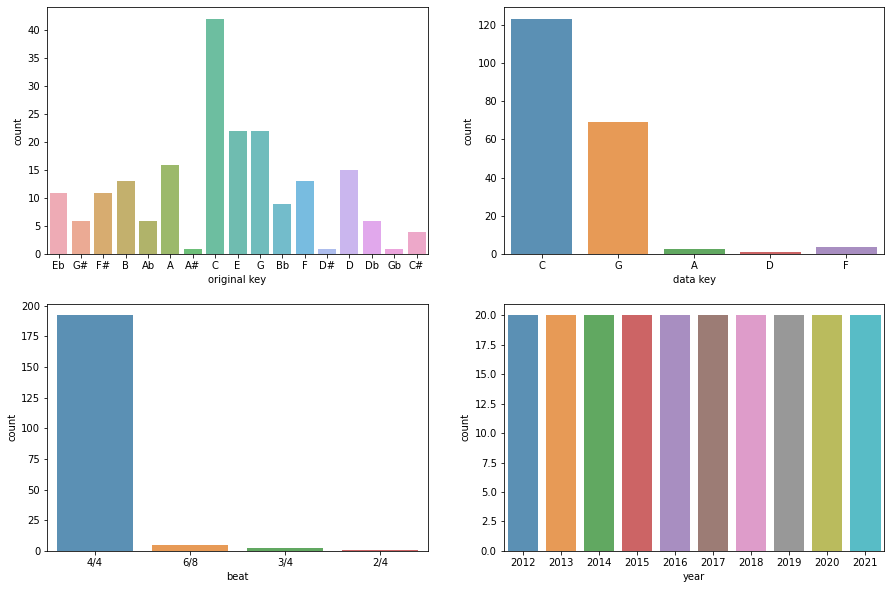

In [26]:
plt.figure(figsize = (15,6))
plt.subplot(221)
sns.countplot(x = df['original_key'], data=df, alpha = 0.8)
plt.xlabel('original key')
plt.ylabel('count')
plt.subplot(222)
sns.countplot(x = df['data_key'], data=df, alpha = 0.8)
plt.xlabel('data key')
plt.ylabel('count')
plt.subplot(223)
sns.countplot(x = df['beat'], data=df, alpha = 0.8)
plt.xlabel('beat')
plt.ylabel('count')
plt.subplot(224)
sns.countplot(x = df['year'], data=df, alpha = 0.8)
plt.xlabel('year')
plt.ylabel('count')

In [27]:
df.head()

,name,singer,year,beat,original_key,data_key,verse_progression1,verse_progression2,verse_progression3,verse_progression4,chorus_progression1,chorus_progression2,chorus_progression3,chorus_progression4
0,云与海,阿YueYue,2021,4/4,Eb,C,Fmaj7->G->Am->Am,Fmaj7->G->C->C,Fmaj7->G->Em->Am,Fmaj7->G->Em7->Am,F->G->Em->Am,F->G->C->C7,NaN,NaN
1,浪子闲话,花僮,2021,4/4,G#,G,Em->D->Bm7->Em,C->D->G->G,C->D->Bm7->Em,C->D->Em->Em,C->D->Bm7->Em,C->D->G->G,C->D->Em->Em,NaN
2,踏山河,是七叔呢,2021,4/4,F#,G,C->D->Bm7->Em,C->D->G->B7,C->D->Em->Em,NaN,C->D->Bm7->Em,C->D->G->B7,C->D->Em->Em,NaN
3,白月光与朱砂痣,大籽,2021,4/4,B,G,Em->C->Dsus4->G,NaN,NaN,NaN,Em->C->D->G,NaN,NaN,NaN
4,醒不来的梦,回小仙,2021,4/4,Ab,G,Em->D->C->G,Am->Em->Am->B7,NaN,NaN,Em->D->C->G,Am->Em->Am->B7,NaN,NaN


## Version 1.1.1: No weight added to any chord; Sentences as unit; No chord simplification

In [28]:
df['verse_progression_sentence'] = df['verse_progression1'].map(str) + ',' + \
                                df['verse_progression2'].map(str) + ',' + \
                                df['verse_progression3'].map(str) + ',' + \
                                df['verse_progression4'].map(str)
df['chorus_progression_sentence'] = df['chorus_progression1'].map(str) + ',' + \
                                df['chorus_progression2'].map(str) + ',' + \
                                df['chorus_progression3'].map(str) + ',' + \
                                df['chorus_progression4'].map(str)
df_chords = df.loc[:, ['name', 'year', 'data_key', 'verse_progression_sentence', 'chorus_progression_sentence']]
df_chords.head()

,name,year,data_key,verse_progression_sentence,chorus_progression_sentence
0,云与海,2021,C,"Fmaj7->G->Am->Am,Fmaj7->G->C->C,Fmaj7->G->Em->...","F->G->Em->Am,F->G->C->C7,nan,nan"
1,浪子闲话,2021,G,"Em->D->Bm7->Em,C->D->G->G,C->D->Bm7->Em,C->D->...","C->D->Bm7->Em,C->D->G->G,C->D->Em->Em,nan"
2,踏山河,2021,G,"C->D->Bm7->Em,C->D->G->B7,C->D->Em->Em,nan","C->D->Bm7->Em,C->D->G->B7,C->D->Em->Em,nan"
3,白月光与朱砂痣,2021,G,"Em->C->Dsus4->G,nan,nan,nan","Em->C->D->G,nan,nan,nan"
4,醒不来的梦,2021,G,"Em->D->C->G,Am->Em->Am->B7,nan,nan","Em->D->C->G,Am->Em->Am->B7,nan,nan"


In [29]:
progression_dict_sentence = {} #dictionary:{'yearverse/chorus':[song index][chord progression group][chord]}
for year in range(2012, 2022):
    year_df = df_chords[df_chords['year'] == year]
    year_verse_chord, year_chorus_chord = [], []
    for i in range(0, len(year_df)):
        verse_chord_list, chorus_chord_list = [], []
        verse_progression_all = year_df.iloc[i]['verse_progression_sentence'] 
        chorus_progression_all = year_df.iloc[i]['chorus_progression_sentence'] #F->G->Em->Am,F->G->C->C7,nan,nan
        data_key = year_df.iloc[i]['data_key']
        verse_chords_all = verse_progression_all.split(',')
        chorus_chords_all = chorus_progression_all.split(',') #['F->G->Em->Am','F->G->C->C7','nan','nan']
        for j in range(0, 4):
            verse_chord_list.append(verse_chords_all[j].split('->'))
            chorus_chord_list.append(chorus_chords_all[j].split('->'))#[['F','G','Em','Am'],['F','G','C','C7'],['nan'],['nan']]
            normalized_verse_list = progression_group_normalization(verse_chord_list, data_key)
            normalized_chorus_list = progression_group_normalization(chorus_chord_list, data_key)
        year_verse_chord.append(normalized_verse_list)
        year_chorus_chord.append(normalized_chorus_list)        
    progression_dict_sentence[str(year)+'verse'] = year_verse_chord
    progression_dict_sentence[str(year)+'chorus'] = year_chorus_chord

In [30]:
similarity_dict_whole_v1_sentence = {}
similarity_dict_add_v1_sentence = {}
similarity_matrix_dict_v1_1_1 = {}
for year in range(2012, 2022):
    verse_similarity_index, chorus_similarity_index = [], []
    verse = copy.deepcopy(progression_dict_sentence[str(year)+'verse'])
    chorus = copy.deepcopy(progression_dict_sentence[str(year)+'chorus'])
    #verse similarity calculation
    for i in verse: # i songs
        while (['nan'] in i):
            i.pop()
    verse_similarity_matrix = np.zeros((len(verse), len(verse))) #compare similarity 2 by 2 and form a matrix
    for i in range(0, len(verse)):
        for j in range(0, len(verse)):
            if i==j:
                verse_similarity_matrix[i][j] = float('inf')
            else:
                verse_similarity_matrix[i][j] = similarity_index_v1(verse[i], verse[j], 0, 0)[0]
    #chorus similarity calculation
    for i in chorus: # i songs
        while (['nan'] in i):
            i.pop()
    chorus_similarity_matrix = np.zeros((len(chorus), len(chorus))) #compare similarity 2 by 2 and form a matrix
    for i in range(0, len(chorus)):
        for j in range(0, len(chorus)):
            if i==j:
                chorus_similarity_matrix[i][j] = float('inf')
            else:
                chorus_similarity_matrix[i][j] = similarity_index_v1(chorus[i], chorus[j], 0, 0)[0]
    similarity_matrix_dict_v1_1_1[str(year)+'verse'] = np.count_nonzero(verse_similarity_matrix == 0)
    similarity_matrix_dict_v1_1_1[str(year)+'chorus'] = np.count_nonzero(chorus_similarity_matrix == 0)
    verse_transpose = verse_similarity_matrix.transpose() 
    chorus_transpose = chorus_similarity_matrix.transpose()  
    for row in verse_transpose:
        inf_index = np.argmax(row==float('inf'))
        new_row = np.delete(row, inf_index)
        verse_similarity_index.append(np.mean(new_row))
    for row in chorus_transpose:
        inf_index = np.argmax(row==float('inf'))
        new_row = np.delete(row, inf_index)
        chorus_similarity_index.append(np.mean(new_row))
    similarity_dict_add_v1_sentence[str(year)] = list(map(lambda x:x[0]+x[1], zip(verse_similarity_index,chorus_similarity_index)))
    similarity_dict_whole_v1_sentence[str(year)+'verse'] =  verse_similarity_index
    similarity_dict_whole_v1_sentence[str(year)+'chorus'] =  chorus_similarity_index

Text(0.5, 1.0, 'Exactly Same Chords in Each Year - Version 1.1.1')

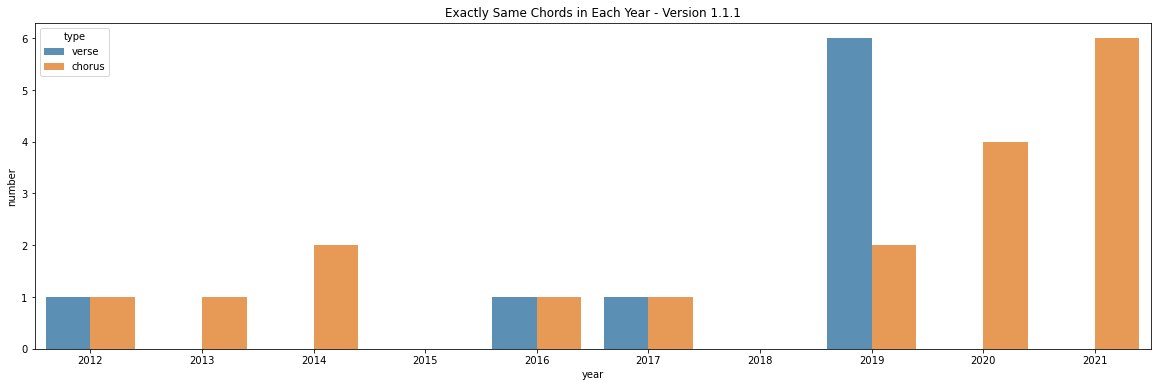

In [32]:
df_similarity_matrix_dict_v1_1_1 = []
for i in similarity_matrix_dict_v1_1_1.keys():
    year_list = []
    year_list.append(i[:4])
    year_list.append(i[4:])
    year_list.append(similarity_matrix_dict_v1_1_1[i])
    df_similarity_matrix_dict_v1_1_1.append(year_list)
df_similarity_matrix_v1_1_1 = pd.DataFrame(df_similarity_matrix_dict_v1_1_1,columns=['year','type','number'])
fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='year', y='number', hue = 'type', alpha = 0.8, data=df_similarity_matrix_v1_1_1)
ax.set_title('Exactly Same Chords in Each Year - Version 1.1.1')

In [33]:
df_index_whole_v1_sentence = pd.DataFrame(columns = similarity_dict_whole_v1_sentence.keys(), index=list(range(20)))
for i in similarity_dict_whole_v1_sentence.keys():
    for j in range(0, len(similarity_dict_whole_v1_sentence[i])):
        df_index_whole_v1_sentence[i][j] = similarity_dict_whole_v1_sentence[i][j]    
df_index_whole_v1_sentence

,2012verse,2012chorus,2013verse,2013chorus,2014verse,2014chorus,2015verse,2015chorus,2016verse,2016chorus,2017verse,2017chorus,2018verse,2018chorus,2019verse,2019chorus,2020verse,2020chorus,2021verse,2021chorus
0,1.720973,1.778436,1.441887,1.424439,1.529369,1.556475,1.759695,1.585235,1.787682,1.812596,1.749427,1.63379,1.393498,1.39677,2.300849,2.554462,1.816418,1.466965,1.225066,1.485765
1,1.710436,1.680953,1.739209,1.651319,1.53892,1.530926,1.469272,1.556937,2.103225,2.102847,1.899374,1.377754,1.50453,1.387404,1.521118,1.587686,1.303757,1.494087,1.159216,1.107021
2,1.457688,1.598155,1.600848,1.801655,1.546881,1.604715,1.717267,1.466379,1.754581,1.757017,1.978584,1.945756,1.364074,2.154236,1.751843,1.526268,1.531886,1.685023,1.3465,1.251261
3,1.665283,1.428208,1.498431,1.363457,1.714535,1.717174,1.740994,1.562944,1.585614,1.576182,1.454003,1.525958,2.014145,2.013414,1.582835,1.612238,1.504371,1.785753,1.773183,1.534029
4,1.518203,1.486414,1.882258,1.851083,1.3313,1.47454,1.667044,1.65331,1.403885,1.623218,1.469621,1.518744,1.419374,1.867651,1.516734,1.457229,1.370289,1.320832,1.685263,1.717337
5,1.543956,1.553691,1.559331,1.548502,2.066906,1.786707,1.790923,1.549699,1.568158,1.72902,1.528824,1.547131,1.371082,1.411097,1.552404,1.467932,1.115986,1.32866,1.797935,1.495538
6,1.912811,1.421015,1.471125,1.606081,2.202924,2.157505,1.569683,1.674772,1.556837,1.549547,1.793692,1.976986,2.253692,1.692211,1.925635,2.021363,1.612043,1.738506,1.474782,1.369085
7,1.823479,1.855589,1.772034,1.568103,1.420295,1.534766,1.572199,2.084016,1.672571,1.634953,1.650105,1.626119,1.533863,1.405303,1.706962,2.520605,1.510522,1.575636,1.405863,1.35121
8,1.539696,1.467532,1.712884,1.603252,1.352302,1.508789,1.606412,1.455003,1.744027,1.746876,1.621514,1.592604,1.80811,1.516234,1.481462,1.626888,1.398788,1.479643,1.494242,1.219451
9,1.716196,1.590646,1.575381,2.30924,1.599778,1.54802,1.556205,1.576006,1.466641,1.446311,1.627307,1.667309,1.625324,1.566777,1.6388,1.407557,1.260927,1.383354,1.20675,1.263245


In [34]:
df_index_add_v1_sentence = pd.DataFrame(columns = similarity_dict_add_v1_sentence.keys(), index=list(range(20)))
for i in similarity_dict_add_v1_sentence.keys():
    for j in range(0, len(similarity_dict_add_v1_sentence[i])):
        df_index_add_v1_sentence[i][j] = similarity_dict_add_v1_sentence[i][j]    
df_index_add_v1_sentence

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,3.49941,2.866326,3.085844,3.34493,3.600277,3.383217,2.790269,4.855311,3.283383,2.710831
1,3.391389,3.390528,3.069846,3.026209,4.206072,3.277128,2.891934,3.108803,2.797845,2.266237
2,3.055843,3.402503,3.151597,3.183646,3.511598,3.924341,3.51831,3.278111,3.216909,2.597761
3,3.09349,2.861888,3.431708,3.303938,3.161796,2.979962,4.027558,3.195072,3.290123,3.307212
4,3.004617,3.73334,2.80584,3.320354,3.027103,2.988365,3.287025,2.973963,2.691121,3.4026
5,3.097648,3.107834,3.853613,3.340622,3.297178,3.075955,2.78218,3.020336,2.444646,3.293473
6,3.333826,3.077206,4.360429,3.244455,3.106384,3.770678,3.945903,3.946998,3.350549,2.843866
7,3.679068,3.340137,2.955061,3.656215,3.307524,3.276224,2.939166,4.227568,3.086158,2.757073
8,3.007227,3.316136,2.861091,3.061416,3.490904,3.214118,3.324343,3.10835,2.87843,2.713693
9,3.306842,3.884621,3.147798,3.132211,2.912952,3.294616,3.192101,3.046357,2.644281,2.469995


<AxesSubplot:title={'center':'Version 1.1.1 verse similarity'}>

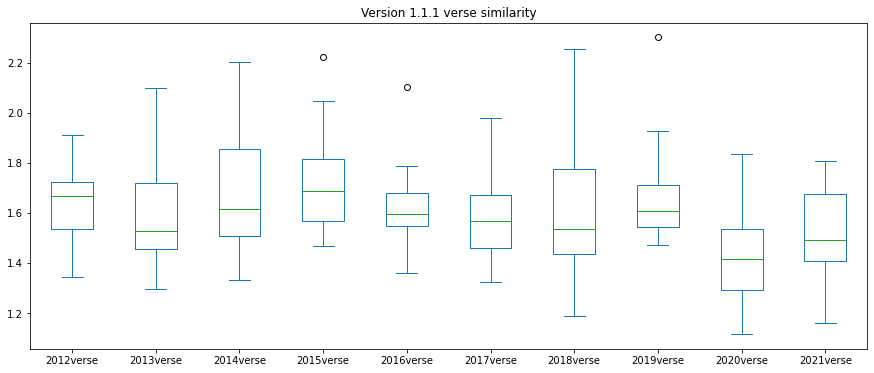

In [35]:
df_index_verse_v1_sentence = df_index_whole_v1_sentence[['2012verse','2013verse','2014verse','2015verse','2016verse', 
                                                        '2017verse', '2018verse','2019verse','2020verse','2021verse']]
df_index_verse_v1_sentence.plot.box(title = 'Version 1.1.1 verse similarity', figsize = (15, 6))

<AxesSubplot:title={'center':'Version 1.1.1 chorus similarity'}>

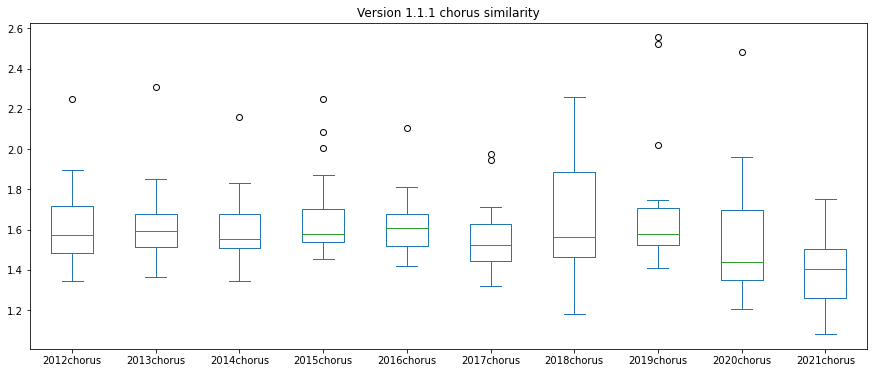

In [36]:
df_index_chorus_v1_sentence = df_index_whole_v1_sentence[['2012chorus','2013chorus','2014chorus','2015chorus','2016chorus', 
                                                        '2017chorus', '2018chorus','2019chorus','2020chorus','2021chorus']]
df_index_chorus_v1_sentence.plot.box(title = 'Version 1.1.1 chorus similarity', figsize = (15, 6))

<AxesSubplot:title={'center':'Version 1.1.1 total similarity'}>

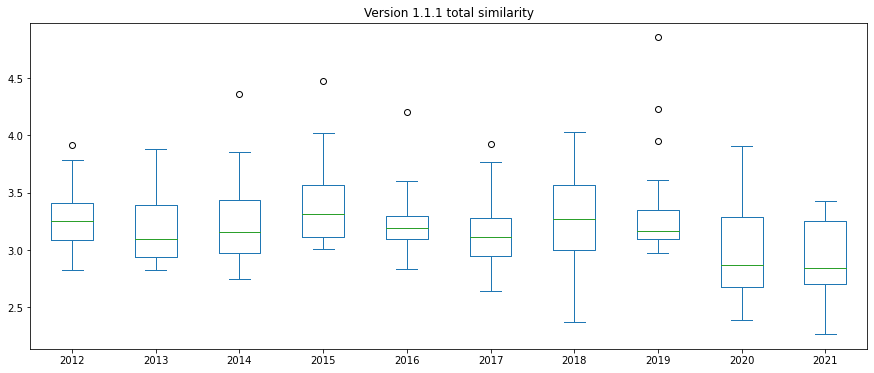

In [37]:
df_index_add_v1_sentence.plot.box(title = 'Version 1.1.1 total similarity', figsize = (15, 6))

## Version 1.1.2: No weight for any chord; Progression as unit; No chord simplification

In [38]:
df.fillna('missing', inplace = True)
def combine_rule(c1, c2, c3, c4):
    if c2 == 'missing' and c3 == 'missing' and c4 == 'missing':
        return ((c1 + '->')*4)[:-2] #1 chord, 234nan
    elif c2 != 'missing' and c3 == 'missing' and c4 == 'missing':
        return ((c1 + '->' + c2 + '->')*2)[:-2] #2 chords, 34nan
    elif c2 != 'missing' and c3 != 'missing' and c4 == 'missing':
        return c1 + '->' + c2 + '->' + c1 + '->' + c3 #3 chords, 4nan
    elif c2 != 'missing' and c3 != 'missing' and c4 != 'missing':
        return c1 + '->' + c2 + '->' + c3 + '->' + c4 #4 chords
    else:
        print('empty')
verse_combine_list, chorus_combine_list = [], []
for i in range(0,len(df)):
    verse_combine_list.append(combine_rule(str(df.iloc[i]['verse_progression1']), str(df.iloc[i]['verse_progression2']),
                                          str(df.iloc[i]['verse_progression3']), str(df.iloc[i]['verse_progression4'])))
    chorus_combine_list.append(combine_rule(str(df.iloc[i]['chorus_progression1']), str(df.iloc[i]['chorus_progression2']),
                                          str(df.iloc[i]['chorus_progression3']), str(df.iloc[i]['chorus_progression4'])))
df['verse_progression_combine'] = verse_combine_list
df['chorus_progression_combine'] = chorus_combine_list
df_progression = df.loc[:, ['name', 'year', 'data_key', 'verse_progression_combine', 'chorus_progression_combine']]
df_progression.head()

,name,year,data_key,verse_progression_combine,chorus_progression_combine
0,云与海,2021,C,Fmaj7->G->Am->Am->Fmaj7->G->C->C->Fmaj7->G->Em...,F->G->Em->Am->F->G->C->C7->F->G->Em->Am->F->G-...
1,浪子闲话,2021,G,Em->D->Bm7->Em->C->D->G->G->C->D->Bm7->Em->C->...,C->D->Bm7->Em->C->D->G->G->C->D->Bm7->Em->C->D...
2,踏山河,2021,G,C->D->Bm7->Em->C->D->G->B7->C->D->Bm7->Em->C->...,C->D->Bm7->Em->C->D->G->B7->C->D->Bm7->Em->C->...
3,白月光与朱砂痣,2021,G,Em->C->Dsus4->G->Em->C->Dsus4->G->Em->C->Dsus4...,Em->C->D->G->Em->C->D->G->Em->C->D->G->Em->C->...
4,醒不来的梦,2021,G,Em->D->C->G->Am->Em->Am->B7->Em->D->C->G->Am->...,Em->D->C->G->Am->Em->Am->B7->Em->D->C->G->Am->...


In [39]:
progression_dict_combine = {}
for year in range(2012, 2022):
    year_df = df_progression[df_progression['year'] == year]
    year_verse_progression, year_chorus_progression = [], []
    for i in range(0, len(year_df)):
        data_key = year_df.iloc[i]['data_key']
        verse_song_list = year_df.iloc[i]['verse_progression_combine'].split('->')
        chorus_song_list = year_df.iloc[i]['chorus_progression_combine'].split('->')
        normalized_verse_list = chord_progression_normalization(verse_song_list, data_key)
        normalized_chorus_list = chord_progression_normalization(chorus_song_list, data_key)       
        year_verse_progression.append(normalized_verse_list)
        year_chorus_progression.append(normalized_chorus_list)
    progression_dict_combine[str(year)+'verse'] = year_verse_progression
    progression_dict_combine[str(year)+'chorus'] = year_chorus_progression

In [40]:
similarity_dict_whole_v1_progression = {}
similarity_dict_add_v1_progression = {}
similarity_matrix_dict_v1_1_2 = {}
for year in range(2012, 2022):
    verse_similarity_index, chorus_similarity_index = [], []
    verse = copy.deepcopy(progression_dict_combine[str(year)+'verse'])
    chorus = copy.deepcopy(progression_dict_combine[str(year)+'chorus'])
    #verse similarity calculation
    verse_similarity_matrix = np.zeros((len(verse), len(verse))) #compare similarity 2 by 2 and form a matrix
    for i in range(0, len(verse)):
        for j in range(0, len(verse)):
            if i == j:
                verse_similarity_matrix[i][j] = float('inf')
            else:
                verse_similarity_matrix[i][j] = similarity_index_v2(verse[i], verse[j], 0, 0)    
    #chorus similarity calculation
    chorus_similarity_matrix = np.zeros((len(chorus), len(chorus))) #compare similarity 2 by 2 and form a matrix
    for i in range(0, len(chorus)):
        for j in range(0, len(chorus)):
            if i == j:
                chorus_similarity_matrix[i][j] = float('inf')
            else:
                chorus_similarity_matrix[i][j] = similarity_index_v2(chorus[i], chorus[j], 0, 0) 
    similarity_matrix_dict_v1_1_2[str(year)+'verse'] = np.count_nonzero(verse_similarity_matrix == 0)
    similarity_matrix_dict_v1_1_2[str(year)+'chorus'] = np.count_nonzero(chorus_similarity_matrix == 0)
    verse_transpose = verse_similarity_matrix.transpose() 
    chorus_transpose = chorus_similarity_matrix.transpose()  
    for row in verse_transpose:
        inf_index = np.argmax(row==float('inf'))
        new_row = np.delete(row, inf_index)
        verse_similarity_index.append(np.mean(new_row))
    for row in chorus_transpose:
        inf_index = np.argmax(row==float('inf'))
        new_row = np.delete(row, inf_index)
        chorus_similarity_index.append(np.mean(new_row))
    similarity_dict_add_v1_progression[str(year)] = list(map(lambda x:x[0]+x[1], zip(verse_similarity_index,chorus_similarity_index)))
    similarity_dict_whole_v1_progression[str(year)+'verse'] =  verse_similarity_index
    similarity_dict_whole_v1_progression[str(year)+'chorus'] =  chorus_similarity_index

Text(0.5, 1.0, 'Exactly Same Chords in Each Year - Version 1.1.2')

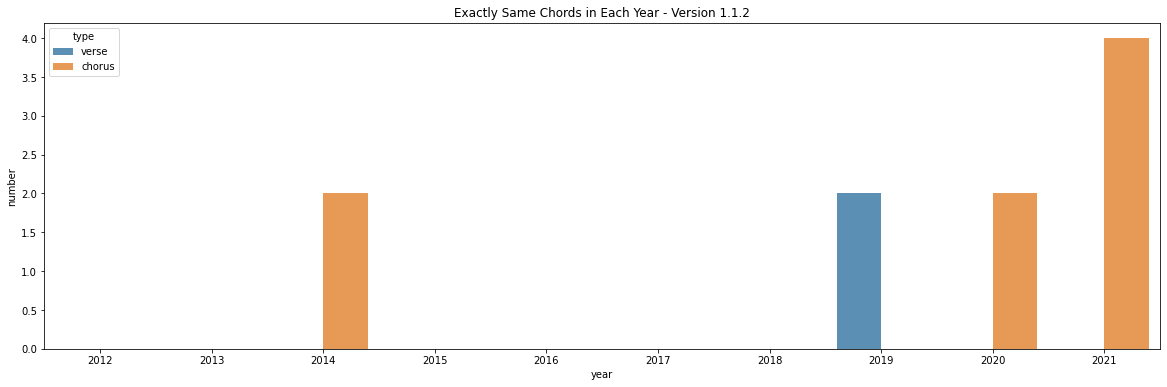

In [41]:
df_similarity_matrix_dict_v1_1_2 = []
for i in similarity_matrix_dict_v1_1_2.keys():
    year_list = []
    year_list.append(i[:4])
    year_list.append(i[4:])
    year_list.append(similarity_matrix_dict_v1_1_2[i])
    df_similarity_matrix_dict_v1_1_2.append(year_list)
df_similarity_matrix_v1_1_2 = pd.DataFrame(df_similarity_matrix_dict_v1_1_2,columns=['year','type','number'])
fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='year', y='number', hue = 'type', alpha = 0.8, data=df_similarity_matrix_v1_1_2)
ax.set_title('Exactly Same Chords in Each Year - Version 1.1.2')

In [42]:
df_index_whole_v1_progression = pd.DataFrame(columns = similarity_dict_whole_v1_progression.keys(), index=list(range(20)))
for i in similarity_dict_whole_v1_progression.keys():
    for j in range(0, len(similarity_dict_whole_v1_progression[i])):
        df_index_whole_v1_progression[i][j] = similarity_dict_whole_v1_progression[i][j]    
df_index_whole_v1_progression

,2012verse,2012chorus,2013verse,2013chorus,2014verse,2014chorus,2015verse,2015chorus,2016verse,2016chorus,2017verse,2017chorus,2018verse,2018chorus,2019verse,2019chorus,2020verse,2020chorus,2021verse,2021chorus
0,2.033921,2.161807,1.644771,1.804283,1.945204,1.859006,2.210944,2.090257,2.389102,2.230459,2.314222,2.011874,1.585107,1.60155,3.025477,3.388176,2.22724,1.813391,1.450726,1.896954
1,2.069745,2.05303,2.143965,1.910389,1.851904,1.872076,1.678683,1.908232,2.556053,2.554047,2.213964,1.711009,1.443088,1.526147,1.876593,2.042393,1.649333,2.109809,1.42698,1.381027
2,1.51662,1.706244,2.053813,2.357393,1.821711,2.093204,2.059998,1.608264,2.453043,2.485661,2.555118,2.492248,1.45081,2.455779,2.228987,1.866846,1.740588,2.014613,1.697516,1.548563
3,1.585363,1.860336,1.652645,1.740555,2.219695,2.132062,2.01854,1.955614,1.720775,1.811263,1.778631,1.747617,2.255614,2.32186,1.958969,1.966527,2.075698,2.124537,2.325423,1.940322
4,1.723429,1.784154,2.449885,2.409075,1.642937,1.794849,1.715356,1.630082,1.650713,2.106886,1.896975,1.951809,2.006642,2.315058,1.714551,1.726117,1.503372,1.482617,1.93606,1.906035
5,1.64953,1.729587,1.965748,1.904036,2.625578,2.151221,2.322722,1.922317,1.954011,2.040352,1.725908,1.935895,1.377814,1.613939,2.064764,2.200312,1.283686,1.629986,2.329407,1.822833
6,2.077434,1.903098,1.716593,1.842329,2.676627,2.598351,2.105954,1.798867,1.939772,2.058992,2.251692,2.170923,3.058311,2.182604,2.481049,2.361343,1.879182,2.080011,1.872949,1.736795
7,2.378187,2.503034,2.222722,1.781167,1.692387,1.913652,1.907767,2.45481,2.082761,2.014182,2.055253,1.650877,1.589496,1.743086,2.017246,3.063841,1.874384,2.008371,1.617326,1.511483
8,1.467396,1.899312,1.868909,1.778458,1.691488,1.855543,1.91908,1.868233,2.098431,2.111508,1.826477,1.651905,2.028323,1.806673,1.90544,2.04156,1.449929,1.880104,1.542863,1.327362
9,1.80402,1.782741,2.172026,2.820994,1.890048,1.797586,1.739012,1.775227,1.686634,1.784961,1.881159,2.096417,1.858015,2.085975,1.98261,1.76664,1.667813,1.629231,1.447664,1.541379


In [43]:
df_index_add_v1_progression = pd.DataFrame(columns = similarity_dict_add_v1_progression.keys(), index=list(range(20)))
for i in similarity_dict_add_v1_progression.keys():
    for j in range(0, len(similarity_dict_add_v1_progression[i])):
        df_index_add_v1_progression[i][j] = similarity_dict_add_v1_progression[i][j]    
df_index_add_v1_progression

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,4.195728,3.449054,3.80421,4.301201,4.619561,4.326096,3.186657,6.413653,4.04063,3.34768
1,4.122774,4.054355,3.72398,3.586915,5.1101,3.924973,2.969234,3.918987,3.759142,2.808006
2,3.222864,4.411207,3.914915,3.668262,4.938704,5.047366,3.906589,4.095833,3.755201,3.246078
3,3.445699,3.3932,4.351756,3.974153,3.532037,3.526248,4.577474,3.925496,4.200236,4.265745
4,3.507583,4.858959,3.437786,3.345438,3.757599,3.848784,4.3217,3.440668,2.985989,3.842096
5,3.379117,3.869784,4.776799,4.245039,3.994362,3.661803,2.991753,4.265076,2.913673,4.15224
6,3.980532,3.558922,5.274977,3.904821,3.998764,4.422615,5.240915,4.842392,3.959193,3.609744
7,4.881221,4.003889,3.606039,4.362577,4.096943,3.70613,3.332581,5.081087,3.882756,3.128809
8,3.366707,3.647367,3.54703,3.787313,4.20994,3.478382,3.834996,3.947,3.330033,2.870226
9,3.586761,4.993021,3.687634,3.514238,3.471595,3.977576,3.94399,3.74925,3.297043,2.989043


<AxesSubplot:title={'center':'Version 1.1.2 verse similarity'}>

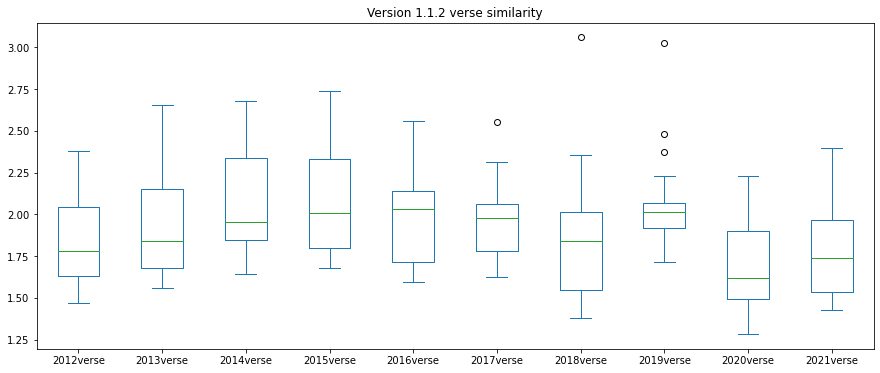

In [44]:
df_index_verse_v1_progression = df_index_whole_v1_progression[['2012verse','2013verse','2014verse','2015verse','2016verse', 
                                                               '2017verse', '2018verse','2019verse','2020verse','2021verse']]
df_index_verse_v1_progression.plot.box(title = 'Version 1.1.2 verse similarity', figsize = (15, 6))

<AxesSubplot:title={'center':'Version 1.1.2 chorus similarity'}>

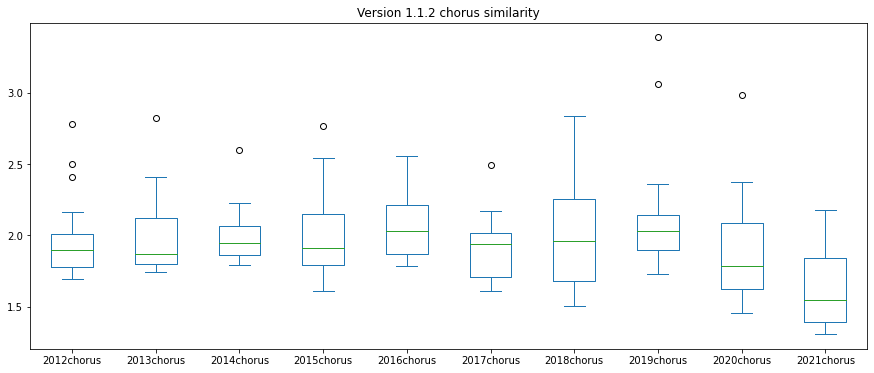

In [45]:
df_index_chorus_v1_progression = df_index_whole_v1_progression[['2012chorus','2013chorus','2014chorus','2015chorus','2016chorus', 
                                                                '2017chorus', '2018chorus','2019chorus','2020chorus','2021chorus']]
df_index_chorus_v1_progression.plot.box(title = 'Version 1.1.2 chorus similarity', figsize = (15, 6))

<AxesSubplot:title={'center':'Version 1.1.2 total similarity'}>

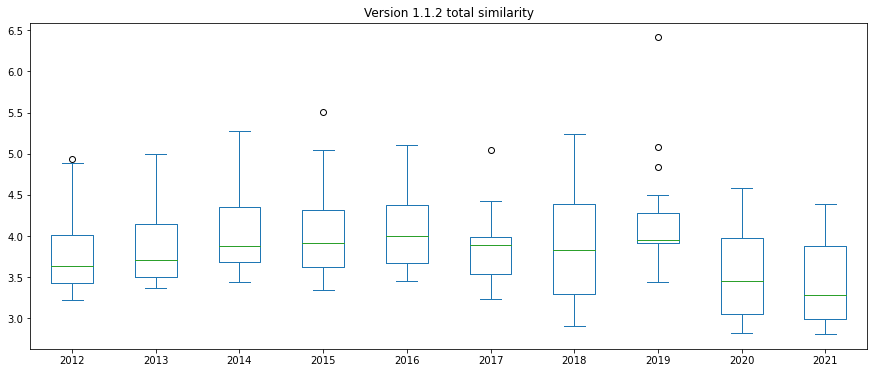

In [46]:
df_index_add_v1_progression.plot.box(title = 'Version 1.1.2 total similarity', figsize = (15, 6))

## Version 1.2.1 No weight for any chord; Sentence as unit; Chord simplification

In [47]:
simplified_dict_sentence_copy = copy.deepcopy(progression_dict_sentence)
simplified_dict_sentence = {} #simplified progression group dictionary
for key in simplified_dict_sentence_copy:
    year_song_list = []
    year_song = simplified_dict_sentence_copy.get(key)
    for progression_group in year_song:
        simplified_group = progression_group_simplification(progression_group)
        year_song_list.append(simplified_group)
    simplified_dict_sentence[key] = year_song_list

In [48]:
simplified_similarity_whole_v1_sentence = {}
simplified_similarity_add_v1_sentence = {}
similarity_matrix_dict_v1_2_1 = {}
for year in range(2012, 2022):
    verse_similarity_index, chorus_similarity_index = [], []
    verse = copy.deepcopy(simplified_dict_sentence[str(year)+'verse'])
    chorus = copy.deepcopy(simplified_dict_sentence[str(year)+'chorus'])
    #verse similarity calculation
    for i in verse: # i songs
        while (['nan'] in i):
            i.pop()
    verse_similarity_matrix = np.zeros((len(verse), len(verse))) #compare similarity 2 by 2 and form a matrix
    for i in range(0, len(verse)):
        for j in range(0, len(verse)):
            if i==j:
                verse_similarity_matrix[i][j] = float('inf')
            else:
                verse_similarity_matrix[i][j] = similarity_index_v1(verse[i], verse[j], 0, 0)[0]
    #chorus similarity calculation
    for i in chorus: # i songs
        while (['nan'] in i):
            i.pop()
    chorus_similarity_matrix = np.zeros((len(chorus), len(chorus))) #compare similarity 2 by 2 and form a matrix
    for i in range(0, len(chorus)):
        for j in range(0, len(chorus)):
            if i == j:
                chorus_similarity_matrix[i][j] = float('inf')
            else:
                chorus_similarity_matrix[i][j] = similarity_index_v1(chorus[i], chorus[j], 0, 0)[0]
    similarity_matrix_dict_v1_2_1[str(year)+'verse'] = np.count_nonzero(verse_similarity_matrix == 0)
    similarity_matrix_dict_v1_2_1[str(year)+'chorus'] = np.count_nonzero(chorus_similarity_matrix == 0)
    verse_transpose = verse_similarity_matrix.transpose() 
    chorus_transpose = chorus_similarity_matrix.transpose()  
    for row in verse_transpose:
        inf_index = np.argmax(row==float('inf'))
        new_row = np.delete(row, inf_index)
        verse_similarity_index.append(np.mean(new_row))
    for row in chorus_transpose:
        inf_index = np.argmax(row==float('inf'))
        new_row = np.delete(row, inf_index)
        chorus_similarity_index.append(np.mean(new_row))
    simplified_similarity_add_v1_sentence[str(year)] = list(map(lambda x:x[0]+x[1], zip(verse_similarity_index,chorus_similarity_index)))
    simplified_similarity_whole_v1_sentence[str(year)+'verse'] =  verse_similarity_index
    simplified_similarity_whole_v1_sentence[str(year)+'chorus'] =  chorus_similarity_index

Text(0.5, 1.0, 'Exactly Same Chords in Each Year - Version 1.2.1')

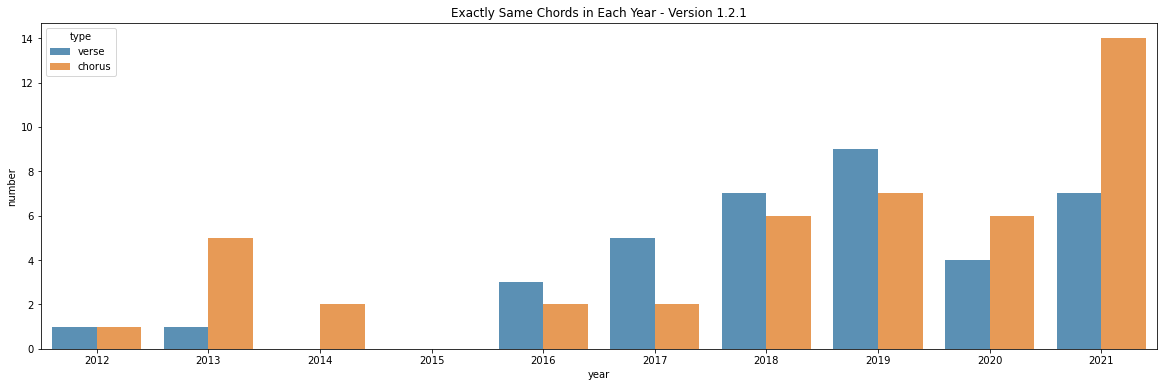

In [49]:
df_similarity_matrix_dict_v1_2_1 = []
for i in similarity_matrix_dict_v1_2_1.keys():
    year_list = []
    year_list.append(i[:4])
    year_list.append(i[4:])
    year_list.append(similarity_matrix_dict_v1_2_1[i])
    df_similarity_matrix_dict_v1_2_1.append(year_list)
df_similarity_matrix_v1_2_1 = pd.DataFrame(df_similarity_matrix_dict_v1_2_1,columns=['year','type','number'])
fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='year', y='number', hue = 'type', alpha = 0.8, data=df_similarity_matrix_v1_2_1)
ax.set_title('Exactly Same Chords in Each Year - Version 1.2.1')

In [50]:
df_simplified_whole_v1_sentence = pd.DataFrame(columns = simplified_similarity_whole_v1_sentence.keys(), index=list(range(20)))
for i in simplified_similarity_whole_v1_sentence.keys():
    for j in range(0, len(simplified_similarity_whole_v1_sentence[i])):
        df_simplified_whole_v1_sentence[i][j] = simplified_similarity_whole_v1_sentence[i][j]    
df_simplified_whole_v1_sentence

,2012verse,2012chorus,2013verse,2013chorus,2014verse,2014chorus,2015verse,2015chorus,2016verse,2016chorus,2017verse,2017chorus,2018verse,2018chorus,2019verse,2019chorus,2020verse,2020chorus,2021verse,2021chorus
0,1.777731,1.810775,1.571018,1.388278,1.523691,1.569395,1.796286,1.569188,1.69174,1.709436,1.935901,1.845177,1.434764,1.442514,2.345713,2.542991,1.628591,1.393041,1.136613,1.2666
1,1.87149,1.751248,1.292379,1.217551,1.499244,1.481666,1.473031,1.596306,2.163474,2.158527,1.892435,1.335657,1.475251,1.33108,1.545443,1.612499,1.261993,1.638644,1.083635,1.053196
2,1.482477,1.659592,1.564766,1.78169,1.498394,1.561812,1.706656,1.57226,1.725931,1.740186,1.821103,1.795082,1.308915,2.190538,1.690557,1.481459,1.572196,1.811346,1.270583,1.226158
3,1.704008,1.444633,1.37839,1.313219,1.825233,1.577151,1.780698,1.617722,1.648229,1.656454,1.478955,1.592002,2.017015,2.028274,1.663556,1.702007,1.260356,1.422441,1.50736,1.485875
4,1.536261,1.459132,1.355222,1.465345,1.259656,1.327038,1.68603,1.682785,1.374208,1.557668,1.452756,1.528765,1.37646,1.85641,1.625259,1.483543,1.24648,1.241692,1.729915,1.775627
5,1.563227,1.591894,1.449758,1.442684,2.103955,1.817847,1.780286,1.522983,1.630465,1.787533,1.58977,1.569912,1.308915,1.415836,1.528315,1.532572,1.104945,1.289169,1.822502,1.556301
6,1.906736,1.37581,1.499749,1.67501,2.230503,2.265914,1.563246,1.697471,1.430979,1.508669,1.779333,1.965473,2.272133,1.738241,1.911145,2.069968,1.699243,1.803325,1.418997,1.346481
7,1.840981,1.850048,1.79829,1.510019,1.387428,1.473218,1.68495,2.117901,1.73921,1.678285,1.682636,1.65049,1.445969,1.332314,1.732493,2.567206,1.583661,1.640576,1.377309,1.350874
8,1.574044,1.505356,1.761945,1.597143,1.225921,1.43871,1.712101,1.563891,1.757293,1.730403,1.666762,1.65248,1.834193,1.498244,1.473831,1.63896,1.579838,1.633908,1.498299,1.172716
9,1.690823,1.573119,1.513002,2.279757,1.79704,1.617792,1.5619,1.566968,1.594265,1.564461,1.723654,1.713074,1.576828,1.422079,1.678794,1.385876,1.318732,1.321079,1.20481,1.225837


In [51]:
df_simplified_add_v1_sentence = pd.DataFrame(columns = simplified_similarity_add_v1_sentence.keys(), index=list(range(20)))
for i in simplified_similarity_add_v1_sentence.keys():
    for j in range(0, len(simplified_similarity_add_v1_sentence[i])):
        df_simplified_add_v1_sentence[i][j] = simplified_similarity_add_v1_sentence[i][j]    
df_simplified_add_v1_sentence

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,3.588506,2.959296,3.093087,3.365475,3.401176,3.781079,2.877278,4.888704,3.021632,2.403213
1,3.622738,2.509931,2.98091,3.069337,4.322,3.228092,2.806331,3.157942,2.900637,2.136831
2,3.142068,3.346456,3.060206,3.278916,3.466117,3.616185,3.499452,3.172016,3.383543,2.496742
3,3.148641,2.691609,3.402384,3.39842,3.304683,3.070957,4.045289,3.365563,2.682798,2.993235
4,2.995394,2.820567,2.586694,3.368815,2.931876,2.981521,3.23287,3.108802,2.488172,3.505542
5,3.155121,2.892442,3.921803,3.303269,3.417997,3.159682,2.724751,3.060888,2.394114,3.378803
6,3.282546,3.17476,4.496417,3.260717,2.939648,3.744806,4.010374,3.981113,3.502568,2.765478
7,3.691029,3.308309,2.860647,3.80285,3.417495,3.333127,2.778283,4.299699,3.224237,2.728183
8,3.0794,3.359089,2.664631,3.275992,3.487697,3.319242,3.332437,3.112792,3.213745,2.671015
9,3.263942,3.792759,3.414832,3.128868,3.158725,3.436728,2.998907,3.06467,2.639811,2.430647


<AxesSubplot:title={'center':'Version 1.2.1 verse similarity'}>

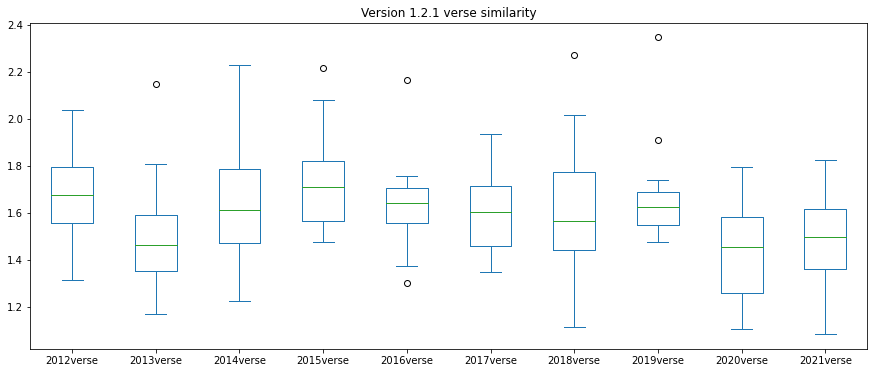

In [52]:
df_simplified_verse_whole_v1_sentence = df_simplified_whole_v1_sentence[['2012verse','2013verse','2014verse','2015verse','2016verse', 
                                                                        '2017verse', '2018verse','2019verse','2020verse','2021verse']]
df_simplified_verse_whole_v1_sentence.plot.box(title = 'Version 1.2.1 verse similarity', figsize = (15, 6))

<AxesSubplot:title={'center':'Version 1.2.1 chorus similarity'}>

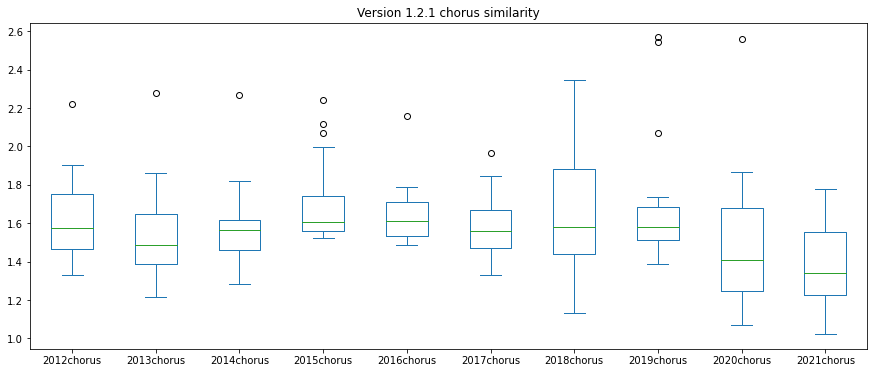

In [53]:
df_simplified_chorus_v1_sentence = df_simplified_whole_v1_sentence[['2012chorus','2013chorus','2014chorus','2015chorus','2016chorus', 
                                                                    '2017chorus', '2018chorus','2019chorus','2020chorus','2021chorus']]
df_simplified_chorus_v1_sentence.plot.box(title = 'Version 1.2.1 chorus similarity', figsize = (15, 6))

<AxesSubplot:title={'center':'Version 1.2.1 total similarity'}>

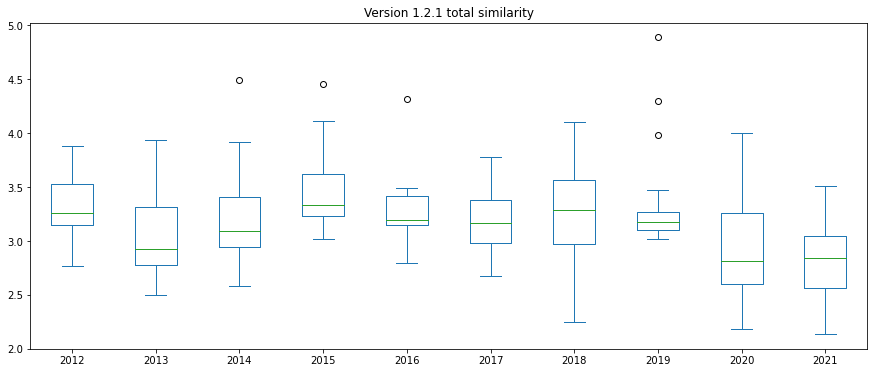

In [54]:
df_simplified_add_v1_sentence.plot.box(title = 'Version 1.2.1 total similarity', figsize = (15, 6))

## Version 1.2.2 No weight for any chord; Progression as unit; Chord simplification

In [55]:
simplified_dict_combine_copy = copy.deepcopy(progression_dict_combine)
simplified_dict_combine = {} #simplified progression group dictionary
for key in simplified_dict_combine_copy:
    year_song_list = []
    year_song = simplified_dict_combine_copy.get(key)   
    for chord_list in year_song:
        simplified_list = chord_progression_simplification(chord_list)    
        year_song_list.append(simplified_list)
    simplified_dict_combine[key] = year_song_list

In [56]:
simplified_similarity_whole_v1_progression = {}
simplified_similarity_add_v1_progression = {}
similarity_matrix_dict_v1_2_2 = {}
for year in range(2012, 2022):
    verse_similarity_index, chorus_similarity_index = [], []
    verse = copy.deepcopy(simplified_dict_combine[str(year)+'verse'])
    chorus = copy.deepcopy(simplified_dict_combine[str(year)+'chorus'])
    #verse similarity calculation
    verse_similarity_matrix = np.zeros((len(verse), len(verse))) #compare similarity 2 by 2 and form a matrix
    for i in range(0, len(verse)):
        for j in range(0, len(verse)):
            if i == j:
                verse_similarity_matrix[i][j] = float('inf')
            else:
                verse_similarity_matrix[i][j] = similarity_index_v2(verse[i], verse[j], 0, 0)    
    #chorus similarity calculation
    chorus_similarity_matrix = np.zeros((len(chorus), len(chorus))) #compare similarity 2 by 2 and form a matrix
    for i in range(0, len(chorus)):
        for j in range(0, len(chorus)):
            if i == j:
                chorus_similarity_matrix[i][j] = float('inf')
            else:
                chorus_similarity_matrix[i][j] = similarity_index_v2(chorus[i], chorus[j], 0, 0) 
    similarity_matrix_dict_v1_2_2[str(year)+'verse'] = np.count_nonzero(verse_similarity_matrix == 0)
    similarity_matrix_dict_v1_2_2[str(year)+'chorus'] = np.count_nonzero(chorus_similarity_matrix == 0)
    verse_transpose = verse_similarity_matrix.transpose() 
    chorus_transpose = chorus_similarity_matrix.transpose()  
    for row in verse_transpose:
        inf_index = np.argmax(row==float('inf'))
        new_row = np.delete(row, inf_index)
        verse_similarity_index.append(np.mean(new_row))
    for row in chorus_transpose:
        inf_index = np.argmax(row==float('inf'))
        new_row = np.delete(row, inf_index)
        chorus_similarity_index.append(np.mean(new_row))
    simplified_similarity_add_v1_progression[str(year)]=list(map(lambda x:x[0]+x[1],zip(verse_similarity_index,chorus_similarity_index)))
    simplified_similarity_whole_v1_progression[str(year)+'verse'] =  verse_similarity_index
    simplified_similarity_whole_v1_progression[str(year)+'chorus'] =  chorus_similarity_index

Text(0.5, 1.0, 'Exactly Same Chords in Each Year - Version 1.2.2')

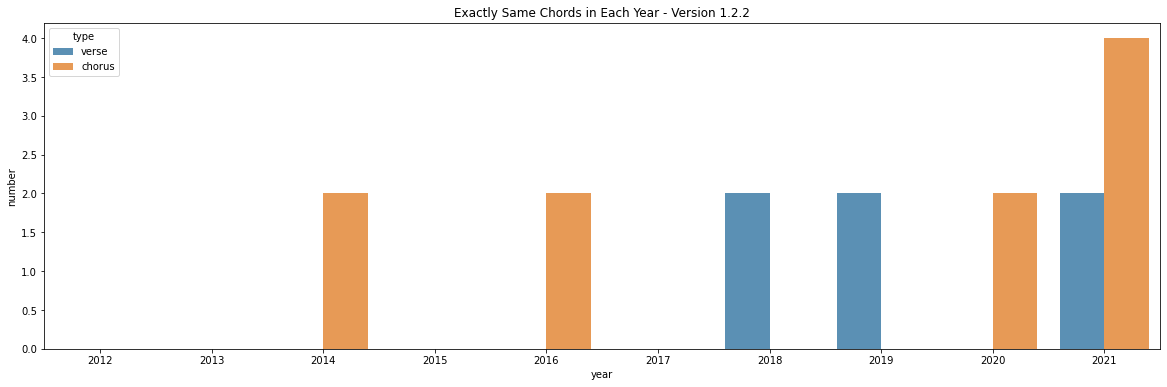

In [57]:
df_similarity_matrix_dict_v1_2_2 = []
for i in similarity_matrix_dict_v1_2_2.keys():
    year_list = []
    year_list.append(i[:4])
    year_list.append(i[4:])
    year_list.append(similarity_matrix_dict_v1_2_2[i])
    df_similarity_matrix_dict_v1_2_2.append(year_list)
df_similarity_matrix_v1_2_2 = pd.DataFrame(df_similarity_matrix_dict_v1_2_2,columns=['year','type','number'])
fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='year', y='number', hue = 'type', alpha = 0.8, data=df_similarity_matrix_v1_2_2)
ax.set_title('Exactly Same Chords in Each Year - Version 1.2.2')

In [58]:
df_simplified_whole_v1_progression = pd.DataFrame(columns = simplified_similarity_whole_v1_progression.keys(), index=list(range(20)))
for i in simplified_similarity_whole_v1_progression.keys():
    for j in range(0, len(simplified_similarity_whole_v1_progression[i])):
        df_simplified_whole_v1_progression[i][j] = simplified_similarity_whole_v1_progression[i][j]    
df_simplified_whole_v1_progression

,2012verse,2012chorus,2013verse,2013chorus,2014verse,2014chorus,2015verse,2015chorus,2016verse,2016chorus,2017verse,2017chorus,2018verse,2018chorus,2019verse,2019chorus,2020verse,2020chorus,2021verse,2021chorus
0,2.098513,2.176003,1.746421,1.878578,1.885557,1.827116,2.28121,2.087606,2.129649,1.843808,2.636822,2.364711,1.60584,1.617409,2.968872,3.339878,2.059651,1.987992,1.410083,1.416727
1,2.216233,2.13196,1.616432,1.491433,1.764637,1.808288,1.713548,1.994643,2.623164,2.603208,2.169936,1.75262,1.431661,1.549317,1.897972,2.078403,1.742766,2.203494,1.351569,1.315739
2,1.549461,1.689688,2.105355,2.120535,1.787832,2.039805,2.115088,1.62988,2.440968,2.480529,2.251241,2.186625,1.338081,2.448318,2.168624,1.802975,1.815185,2.164709,1.614971,1.544599
3,1.743867,1.916434,1.520844,1.530763,2.404653,1.777263,2.058324,1.760941,2.196317,2.190152,1.741098,1.826718,2.226723,2.328462,2.029584,2.050955,2.19624,1.70579,1.846762,1.843256
4,1.756746,1.737693,1.77778,1.828915,1.610636,1.757557,1.757176,1.656038,1.670489,2.039877,1.911387,2.064927,1.680736,2.303464,1.706273,1.708347,1.436739,1.543325,1.963032,1.981919
5,1.737472,1.743255,1.821399,1.751175,2.61887,2.130953,2.351528,1.786524,2.133364,2.061228,1.750205,1.920799,1.338081,1.663701,2.002028,2.21678,1.324717,1.628129,2.353609,1.906271
6,2.097711,1.933031,1.70126,1.834697,2.678871,2.742126,2.160279,2.016449,1.753867,1.818191,2.203824,2.169675,2.899097,2.347509,2.427156,2.394,1.984909,2.155173,1.507915,1.651887
7,2.398044,2.498642,2.206073,1.700598,1.661789,1.840224,2.095127,2.498348,2.160365,2.044417,2.036778,1.682147,1.541199,1.694978,2.03491,3.216614,2.146415,2.274633,1.59107,1.559812
8,1.515531,1.688918,1.927278,1.796854,1.686308,1.83877,1.956908,2.093797,2.139909,2.096855,1.868532,1.683207,1.98254,1.792913,1.925066,2.073812,1.559203,1.991731,1.506993,1.376679
9,1.818656,1.75369,1.838881,2.776807,2.103729,1.811607,1.737817,1.75068,1.790994,1.843808,2.055103,2.283786,1.678606,1.736458,1.973449,1.780796,1.775207,1.648158,1.427783,1.625797


In [59]:
df_simplified_add_v1_progression = pd.DataFrame(columns = simplified_similarity_add_v1_progression.keys(), index=list(range(20)))
for i in simplified_similarity_add_v1_progression.keys():
    for j in range(0, len(simplified_similarity_add_v1_progression[i])):
        df_simplified_add_v1_progression[i][j] = simplified_similarity_add_v1_progression[i][j]    
df_simplified_add_v1_progression

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,4.274516,3.625,3.712673,4.368816,3.973457,5.001533,3.223249,6.308751,4.047642,2.826811
1,4.348193,3.107865,3.572925,3.708191,5.226372,3.922556,2.980978,3.976375,3.94626,2.667308
2,3.239149,4.22589,3.827637,3.744968,4.921497,4.437866,3.786399,3.971599,3.979894,3.15957
3,3.660301,3.051607,4.181916,3.819265,4.386469,3.567816,4.555186,4.080539,3.90203,3.690018
4,3.494439,3.606696,3.368193,3.413214,3.710366,3.976314,3.9842,3.41462,2.980064,3.944951
5,3.480728,3.572574,4.749823,4.138052,4.194592,3.671004,3.001781,4.218808,2.952846,4.25988
6,4.030742,3.535957,5.420997,4.176728,3.572058,4.373499,5.246606,4.821156,4.140082,3.159803
7,4.896686,3.906671,3.502012,4.593475,4.204782,3.718926,3.236177,5.251524,4.421048,3.150882
8,3.204449,3.724132,3.525079,4.050705,4.236763,3.55174,3.775453,3.998878,3.550934,2.883672
9,3.572346,4.615688,3.915336,3.488497,3.634802,4.33889,3.415064,3.754245,3.423365,3.05358


<AxesSubplot:title={'center':'Version 1.2.2 verse similarity'}>

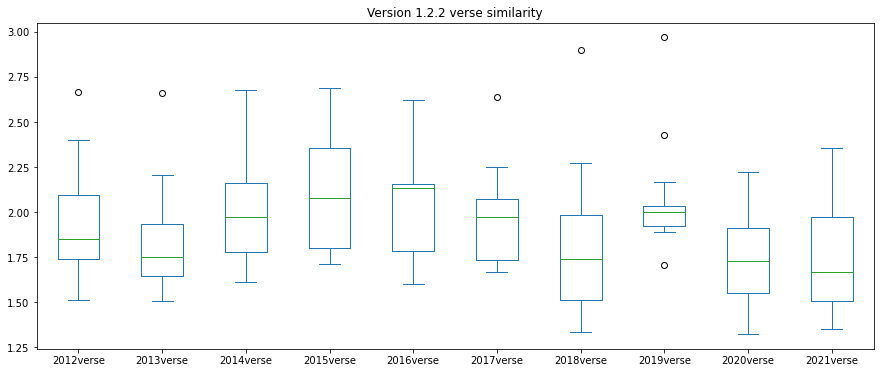

In [60]:
df_simplified_verse_whole_v1_progression=df_simplified_whole_v1_progression[['2012verse','2013verse','2014verse','2015verse','2016verse', 
                                                                        '2017verse', '2018verse','2019verse','2020verse','2021verse']]
df_simplified_verse_whole_v1_progression.plot.box(title = 'Version 1.2.2 verse similarity', figsize = (15, 6))

<AxesSubplot:title={'center':'Version 1.2.2 chorus similarity'}>

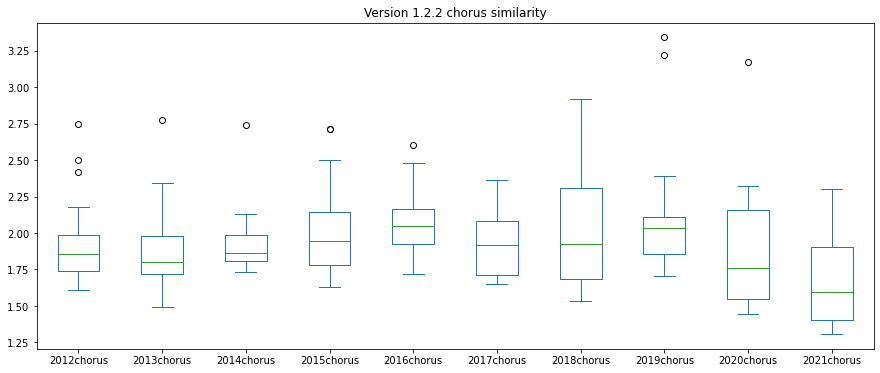

In [61]:
df_simplified_chorus_v1_progression=df_simplified_whole_v1_progression[['2012chorus','2013chorus','2014chorus','2015chorus','2016chorus', 
                                                                    '2017chorus', '2018chorus','2019chorus','2020chorus','2021chorus']]
df_simplified_chorus_v1_progression.plot.box(title = 'Version 1.2.2 chorus similarity', figsize = (15, 6))

<AxesSubplot:title={'center':'Version 1.2.2 total similarity'}>

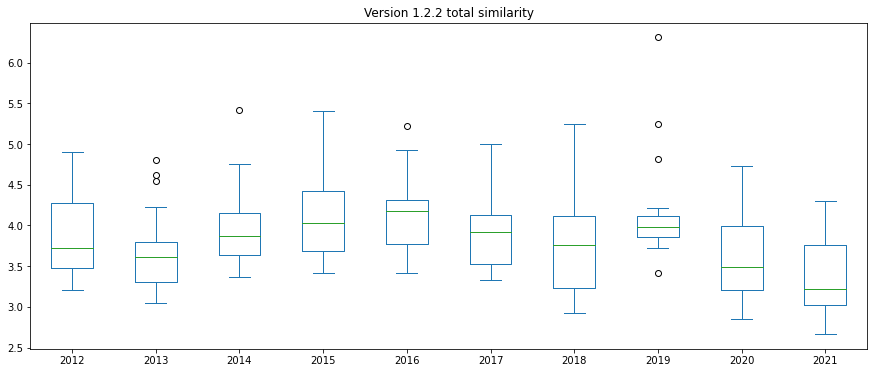

In [62]:
df_simplified_add_v1_progression.plot.box(title = 'Version 1.2.2 total similarity', figsize = (15, 6))

## Version 1.3.1: No weight for any chord; Sentence as unit; Root transition

In [63]:
similarity_dict_whole_v3_sentence = {}
similarity_dict_add_v3_sentence = {}
similarity_matrix_dict_v1_3_1 = {}
for year in range(2012, 2022):
    verse_similarity_index, chorus_similarity_index = [], []
    verse = copy.deepcopy(progression_dict_sentence[str(year)+'verse'])
    chorus = copy.deepcopy(progression_dict_sentence[str(year)+'chorus'])
    #verse similarity calculation
    for i in verse: # i songs
        while (['nan'] in i):
            i.pop()
    verse_similarity_matrix = np.zeros((len(verse), len(verse))) #compare similarity 2 by 2 and form a matrix
    for i in range(0, len(verse)):
        for j in range(0, len(verse)):
            if i==j:
                verse_similarity_matrix[i][j] = float('inf')
            else:
                verse_similarity_matrix[i][j] = root_similarity_index_v1(verse[i], verse[j], 0, 0)[0]
    #chorus similarity calculation
    for i in chorus: # i songs
        while (['nan'] in i):
            i.pop()
    chorus_similarity_matrix = np.zeros((len(chorus), len(chorus))) #compare similarity 2 by 2 and form a matrix
    for i in range(0, len(chorus)):
        for j in range(0, len(chorus)):
            if i==j:
                chorus_similarity_matrix[i][j] = float('inf')
            else:
                chorus_similarity_matrix[i][j] = root_similarity_index_v1(chorus[i], chorus[j], 0, 0)[0]
    similarity_matrix_dict_v1_3_1[str(year)+'verse'] = np.count_nonzero(verse_similarity_matrix == 0)
    similarity_matrix_dict_v1_3_1[str(year)+'chorus'] = np.count_nonzero(chorus_similarity_matrix == 0)
    verse_transpose = verse_similarity_matrix.transpose() 
    chorus_transpose = chorus_similarity_matrix.transpose()  
    for row in verse_transpose:
        inf_index = np.argmax(row==float('inf'))
        new_row = np.delete(row, inf_index)
        verse_similarity_index.append(np.mean(new_row))
    for row in chorus_transpose:
        inf_index = np.argmax(row==float('inf'))
        new_row = np.delete(row, inf_index)
        chorus_similarity_index.append(np.mean(new_row))
    similarity_dict_add_v3_sentence[str(year)] = list(map(lambda x:x[0]+x[1], zip(verse_similarity_index,chorus_similarity_index)))
    similarity_dict_whole_v3_sentence[str(year)+'verse'] =  verse_similarity_index
    similarity_dict_whole_v3_sentence[str(year)+'chorus'] =  chorus_similarity_index

Text(0.5, 1.0, 'Exactly Same Chords in Each Year - Version 1.3.1')

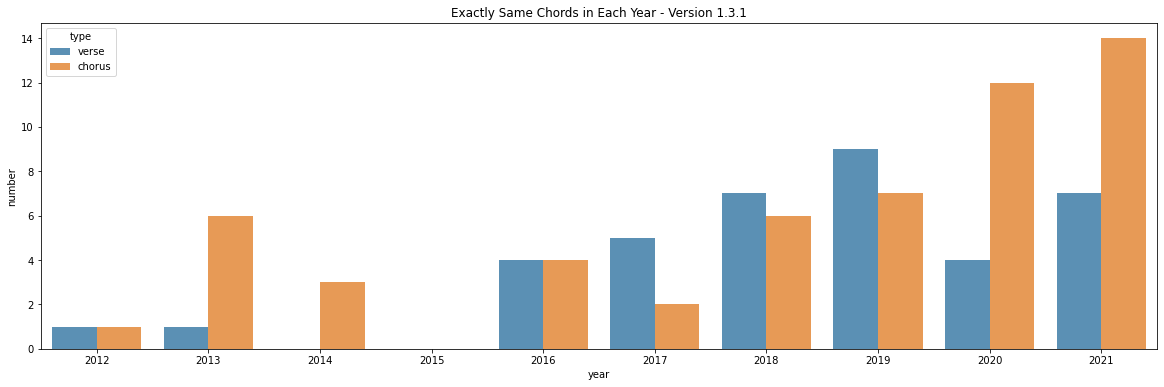

In [64]:
df_similarity_matrix_dict_v1_3_1 = []
for i in similarity_matrix_dict_v1_3_1.keys():
    year_list = []
    year_list.append(i[:4])
    year_list.append(i[4:])
    year_list.append(similarity_matrix_dict_v1_3_1[i])
    df_similarity_matrix_dict_v1_3_1.append(year_list)
df_similarity_matrix_v1_3_1 = pd.DataFrame(df_similarity_matrix_dict_v1_3_1,columns=['year','type','number'])
fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='year', y='number', hue = 'type', alpha = 0.8, data=df_similarity_matrix_v1_3_1)
ax.set_title('Exactly Same Chords in Each Year - Version 1.3.1')

In [65]:
df_index_whole_v3_sentence = pd.DataFrame(columns = similarity_dict_whole_v3_sentence.keys(), index=list(range(20)))
for i in similarity_dict_whole_v3_sentence.keys():
    for j in range(0, len(similarity_dict_whole_v3_sentence[i])):
        df_index_whole_v3_sentence[i][j] = similarity_dict_whole_v3_sentence[i][j]    
df_index_whole_v3_sentence

,2012verse,2012chorus,2013verse,2013chorus,2014verse,2014chorus,2015verse,2015chorus,2016verse,2016chorus,2017verse,2017chorus,2018verse,2018chorus,2019verse,2019chorus,2020verse,2020chorus,2021verse,2021chorus
0,2.347524,2.377579,1.789184,1.762503,1.808337,1.911642,2.278272,1.716264,1.996784,2.317696,1.940741,1.847011,1.848941,2.262952,2.37504,2.278113,1.885072,1.750996,1.559204,1.741048
1,1.721934,2.054278,1.814608,1.623513,1.553751,1.83013,1.753977,1.790728,2.528543,2.551135,2.491364,1.783392,2.085941,1.775635,2.093177,2.050297,1.653377,1.775816,1.510041,1.478894
2,1.494387,2.328265,1.72857,1.878122,1.83063,2.013714,1.793121,1.917231,2.113463,2.190372,2.41755,2.398356,2.005285,2.6747,2.222846,1.844489,2.423487,2.212716,1.746317,1.672477
3,2.175079,1.791184,2.033247,1.654815,1.959288,1.862041,2.357053,2.099834,2.117421,2.154591,1.931098,2.153464,2.27079,2.295052,2.270577,2.291767,1.733023,1.485445,2.194945,2.167396
4,1.627831,1.719097,1.800479,1.972115,1.50977,1.843757,2.309633,2.267485,1.640428,1.882938,1.767085,1.888729,1.773444,2.498245,2.077638,2.07186,1.754839,1.437392,2.256553,2.302892
5,1.870992,1.972071,1.996489,2.021543,1.851172,2.073164,2.204986,1.815474,1.630018,2.421514,2.208935,2.068049,2.005285,2.027155,1.947831,1.769798,1.665031,1.464021,2.133658,1.904016
6,1.607881,1.543098,2.000812,2.111355,2.225354,2.178872,1.767266,1.78381,1.497317,1.832089,2.029826,2.26429,2.325915,2.370156,2.368832,2.200983,2.412409,2.328557,1.945328,1.774923
7,1.839709,1.88546,2.057045,2.233109,1.764171,1.688979,1.818486,2.266768,2.346203,2.293083,1.821851,2.172745,1.805353,1.651548,2.133206,1.946802,1.974707,2.064193,2.085324,2.04347
8,2.014902,1.828852,2.102139,1.968802,1.565083,1.726914,1.836463,1.880587,2.20627,2.389645,2.200671,2.377235,2.016251,1.868284,1.911891,2.150357,2.391682,1.848589,2.266252,1.654476
9,1.922234,1.971055,2.139448,1.901849,2.05351,2.018754,2.147727,2.137328,1.911875,1.944537,1.949105,2.230708,2.02897,1.801347,1.816305,1.679957,1.844882,1.629273,1.636081,1.702215


In [66]:
df_index_add_v3_sentence = pd.DataFrame(columns = similarity_dict_add_v3_sentence.keys(), index=list(range(20)))
for i in similarity_dict_add_v3_sentence.keys():
    for j in range(0, len(similarity_dict_add_v3_sentence[i])):
        df_index_add_v3_sentence[i][j] = similarity_dict_add_v3_sentence[i][j]    
df_index_add_v3_sentence

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,4.725102,3.551686,3.71998,3.994536,4.314481,3.787752,4.111892,4.653153,3.636068,3.300252
1,3.776212,3.438122,3.383881,3.544705,5.079678,4.274757,3.861576,4.143474,3.429193,2.988935
2,3.822652,3.606692,3.844344,3.710352,4.303836,4.815906,4.679985,4.067334,4.636203,3.418793
3,3.966263,3.688062,3.821329,4.456888,4.272012,4.084562,4.565842,4.562344,3.218468,4.362341
4,3.346928,3.772594,3.353527,4.577118,3.523367,3.655814,4.27169,4.149497,3.192231,4.559445
5,3.843063,4.018032,3.924336,4.020459,4.051531,4.276984,4.03244,3.717629,3.129052,4.037674
6,3.150979,4.112166,4.404225,3.551076,3.329406,4.294116,4.696071,4.569815,4.740966,3.720251
7,3.725169,4.290154,3.453151,4.085254,4.639286,3.994596,3.456901,4.080007,4.0389,4.128794
8,3.843754,4.070941,3.291998,3.71705,4.595915,4.577906,3.884535,4.062249,4.240271,3.920728
9,3.893289,4.041297,4.072264,4.285055,3.856412,4.179813,3.830317,3.496262,3.474155,3.338296


<AxesSubplot:title={'center':'Version 1.3.1 verse similarity'}>

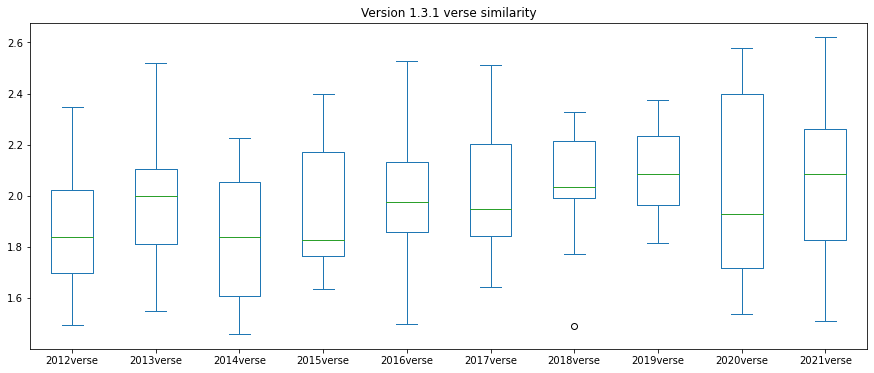

In [67]:
df_index_verse_v3_sentence = df_index_whole_v3_sentence[['2012verse','2013verse','2014verse','2015verse','2016verse', 
                                                        '2017verse', '2018verse','2019verse','2020verse','2021verse']]
df_index_verse_v3_sentence.plot.box(title = 'Version 1.3.1 verse similarity', figsize = (15, 6))

<AxesSubplot:title={'center':'Version 1.3.1 chorus similarity'}>

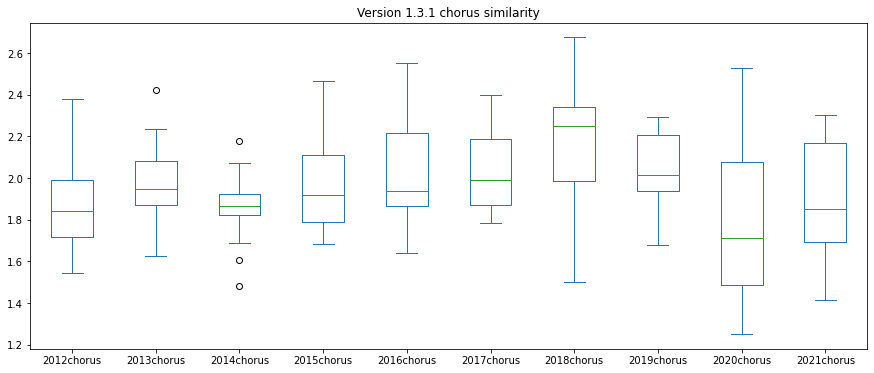

In [68]:
df_index_chorus_v3_sentence = df_index_whole_v3_sentence[['2012chorus','2013chorus','2014chorus','2015chorus','2016chorus', 
                                                        '2017chorus', '2018chorus','2019chorus','2020chorus','2021chorus']]
df_index_chorus_v3_sentence.plot.box(title = 'Version 1.3.1 chorus similarity', figsize = (15, 6))

<AxesSubplot:title={'center':'Version 1.3.1 total similarity'}>

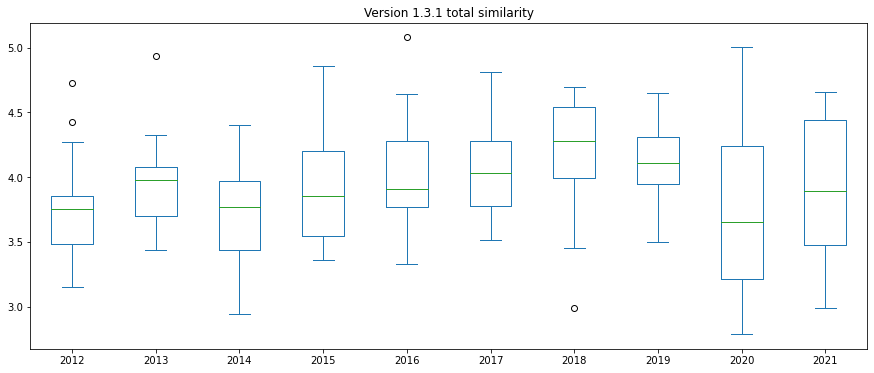

In [69]:
df_index_add_v3_sentence.plot.box(title = 'Version 1.3.1 total similarity', figsize = (15, 6))

## Version 1.3.2: No weight for any chord; Progression as unit; Root transition

In [70]:
similarity_dict_whole_v3_progression = {}
similarity_dict_add_v3_progression = {}
similarity_matrix_dict_v1_3_2 = {}
for year in range(2012, 2022):
    verse_similarity_index, chorus_similarity_index = [], []
    verse = copy.deepcopy(progression_dict_combine[str(year)+'verse'])
    chorus = copy.deepcopy(progression_dict_combine[str(year)+'chorus'])
    #verse similarity calculation
    verse_similarity_matrix = np.zeros((len(verse), len(verse))) #compare similarity 2 by 2 and form a matrix
    for i in range(0, len(verse)):
        for j in range(0, len(verse)):
            if i == j:
                verse_similarity_matrix[i][j] = float('inf')
            else:
                verse_similarity_matrix[i][j] = root_similarity_index_v2(verse[i], verse[j], 0, 0)    
    #chorus similarity calculation
    chorus_similarity_matrix = np.zeros((len(chorus), len(chorus))) #compare similarity 2 by 2 and form a matrix
    for i in range(0, len(chorus)):
        for j in range(0, len(chorus)):
            if i == j:
                chorus_similarity_matrix[i][j] = float('inf')
            else:
                chorus_similarity_matrix[i][j] = root_similarity_index_v2(chorus[i], chorus[j], 0, 0) 
    similarity_matrix_dict_v1_3_2[str(year)+'verse'] = np.count_nonzero(verse_similarity_matrix == 0)
    similarity_matrix_dict_v1_3_2[str(year)+'chorus'] = np.count_nonzero(chorus_similarity_matrix == 0)
    verse_transpose = verse_similarity_matrix.transpose() 
    chorus_transpose = chorus_similarity_matrix.transpose()  
    for row in verse_transpose:
        inf_index = np.argmax(row==float('inf'))
        new_row = np.delete(row, inf_index)
        verse_similarity_index.append(np.mean(new_row))
    for row in chorus_transpose:
        inf_index = np.argmax(row==float('inf'))
        new_row = np.delete(row, inf_index)
        chorus_similarity_index.append(np.mean(new_row))
    similarity_dict_add_v3_progression[str(year)] = list(map(lambda x:x[0]+x[1], zip(verse_similarity_index,chorus_similarity_index)))
    similarity_dict_whole_v3_progression[str(year)+'verse'] =  verse_similarity_index
    similarity_dict_whole_v3_progression[str(year)+'chorus'] =  chorus_similarity_index

Text(0.5, 1.0, 'Exactly Same Chords in Each Year - Version 1.3.2')

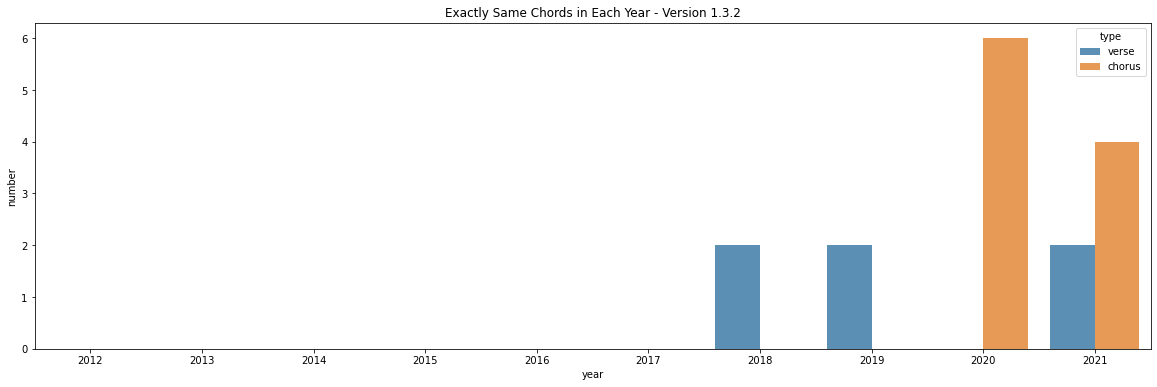

In [71]:
df_similarity_matrix_dict_v1_3_2 = []
for i in similarity_matrix_dict_v1_3_2.keys():
    year_list = []
    year_list.append(i[:4])
    year_list.append(i[4:])
    year_list.append(similarity_matrix_dict_v1_3_2[i])
    df_similarity_matrix_dict_v1_3_2.append(year_list)
df_similarity_matrix_v1_3_2 = pd.DataFrame(df_similarity_matrix_dict_v1_3_2,columns=['year','type','number'])
fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='year', y='number', hue = 'type', alpha = 0.8, data=df_similarity_matrix_v1_3_2)
ax.set_title('Exactly Same Chords in Each Year - Version 1.3.2')

In [72]:
df_index_whole_v3_progression = pd.DataFrame(columns = similarity_dict_whole_v3_progression.keys(), index=list(range(20)))
for i in similarity_dict_whole_v3_progression.keys():
    for j in range(0, len(similarity_dict_whole_v3_progression[i])):
        df_index_whole_v3_progression[i][j] = similarity_dict_whole_v3_progression[i][j]    
df_index_whole_v3_progression

,2012verse,2012chorus,2013verse,2013chorus,2014verse,2014chorus,2015verse,2015chorus,2016verse,2016chorus,2017verse,2017chorus,2018verse,2018chorus,2019verse,2019chorus,2020verse,2020chorus,2021verse,2021chorus
0,1.464884,1.442909,1.534298,1.929873,1.861561,1.371834,1.556214,1.518022,1.494266,1.485479,1.460592,1.840736,1.84413,1.442194,2.073114,1.959032,2.064466,1.976331,1.267278,1.244209
1,1.395382,1.466513,1.340011,1.460621,1.240406,1.304922,1.738045,1.627782,1.624426,1.610847,1.495044,1.433666,1.520772,1.753106,1.262993,1.420516,1.466995,1.872502,1.316238,1.269492
2,1.629356,1.606045,1.342692,1.50901,1.379034,1.371985,1.347759,1.393795,1.610433,1.666518,1.501886,1.428753,1.274009,1.594021,1.337491,1.343584,1.542878,1.616287,1.562877,1.574682
3,1.561857,1.744294,1.330736,1.291941,1.392666,1.281862,1.465022,1.472509,1.708386,1.770042,1.491456,1.311851,1.421651,1.338815,1.505781,1.502851,1.803833,1.218924,1.325327,1.367143
4,1.533697,1.278005,1.198939,1.316309,1.447184,1.82624,1.645458,1.544451,1.600757,1.692415,1.656479,1.444886,1.46012,1.414469,1.434688,1.597836,1.271773,1.589063,1.63095,1.675747
5,1.774432,1.973295,1.406108,1.470505,1.396373,1.529093,1.961064,1.55963,1.693432,1.592983,1.614976,1.372566,1.274009,1.7769,1.81623,2.141466,1.505102,1.791092,1.322721,1.322579
6,1.411281,1.584561,1.401345,1.556704,1.492474,1.440189,1.967485,2.087452,1.868403,1.368633,1.485031,1.407362,2.080171,1.556152,1.537323,1.731175,1.496062,1.523481,1.509758,1.633904
7,1.485166,1.514509,1.364178,1.381396,1.280782,1.466986,1.44716,1.505089,1.580208,1.498068,1.778324,1.53495,1.38351,1.350091,1.458212,1.605014,1.984327,2.037434,1.298936,1.316572
8,1.469433,1.223686,1.605694,1.68247,1.264383,1.218771,1.869509,1.918827,1.554901,1.497151,1.83607,1.614825,1.405751,1.290652,1.420228,1.349848,1.663172,1.999023,1.505789,1.504233
9,1.746609,1.727576,1.306583,1.432872,1.638579,1.562313,1.529925,1.508401,1.391261,1.402692,1.706898,1.482362,1.355558,1.251426,1.56386,1.360939,1.790954,1.677339,1.557288,1.29911


In [73]:
df_index_add_v3_progression = pd.DataFrame(columns = similarity_dict_add_v3_progression.keys(), index=list(range(20)))
for i in similarity_dict_add_v3_progression.keys():
    for j in range(0, len(similarity_dict_add_v3_progression[i])):
        df_index_add_v3_progression[i][j] = similarity_dict_add_v3_progression[i][j]    
df_index_add_v3_progression

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,2.907793,3.464171,3.233395,3.074235,2.979745,3.301328,3.286325,4.032146,4.040796,2.511486
1,2.861895,2.800632,2.545328,3.365828,3.235273,2.928711,3.273879,2.683509,3.339497,2.585731
2,3.235401,2.851702,2.751019,2.741554,3.276951,2.930638,2.86803,2.681075,3.159165,3.137559
3,3.306152,2.622677,2.674529,2.937531,3.478428,2.803307,2.760466,3.008632,3.022757,2.692471
4,2.811701,2.515249,3.273424,3.189909,3.293172,3.101365,2.874589,3.032524,2.860836,3.306697
5,3.747727,2.876613,2.925466,3.520695,3.286416,2.987543,3.05091,3.957696,3.296194,2.6453
6,2.995842,2.958049,2.932664,4.054937,3.237036,2.892394,3.636323,3.268499,3.019543,3.143662
7,2.999675,2.745574,2.747768,2.952249,3.078275,3.313274,2.733601,3.063226,4.021762,2.615508
8,2.693119,3.288164,2.483154,3.788336,3.052052,3.450894,2.696403,2.770075,3.662195,3.010023
9,3.474185,2.739455,3.200892,3.038325,2.793953,3.18926,2.606984,2.924799,3.468293,2.856397


<AxesSubplot:title={'center':'Version 1.3.2 verse similarity'}>

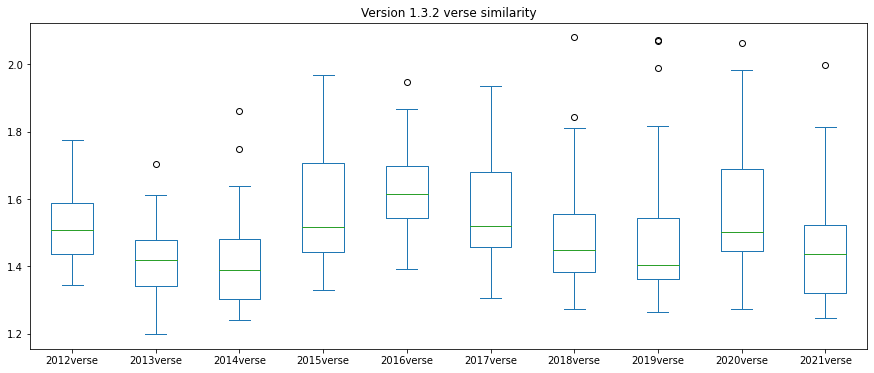

In [74]:
df_index_verse_v3_progression = df_index_whole_v3_progression[['2012verse','2013verse','2014verse','2015verse','2016verse', 
                                                               '2017verse', '2018verse','2019verse','2020verse','2021verse']]
df_index_verse_v3_progression.plot.box(title = 'Version 1.3.2 verse similarity', figsize = (15, 6))

<AxesSubplot:title={'center':'Version 1.3.2 chorus similarity'}>

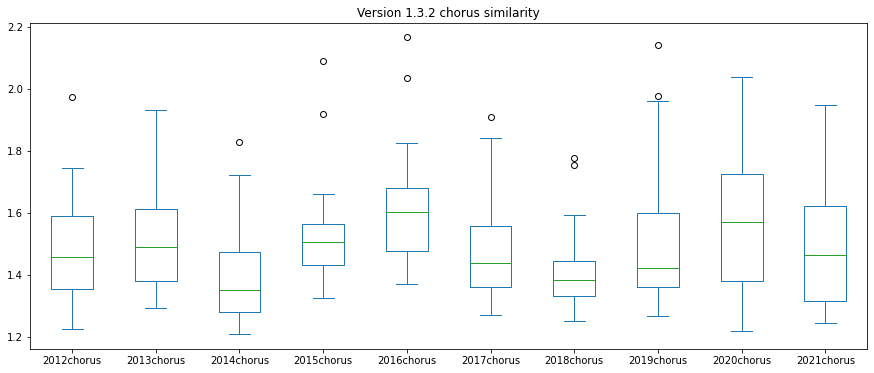

In [75]:
df_index_chorus_v3_progression = df_index_whole_v3_progression[['2012chorus','2013chorus','2014chorus','2015chorus','2016chorus', 
                                                                '2017chorus', '2018chorus','2019chorus','2020chorus','2021chorus']]
df_index_chorus_v3_progression.plot.box(title = 'Version 1.3.2 chorus similarity', figsize = (15, 6))

<AxesSubplot:title={'center':'Version 1.3.2 total similarity'}>

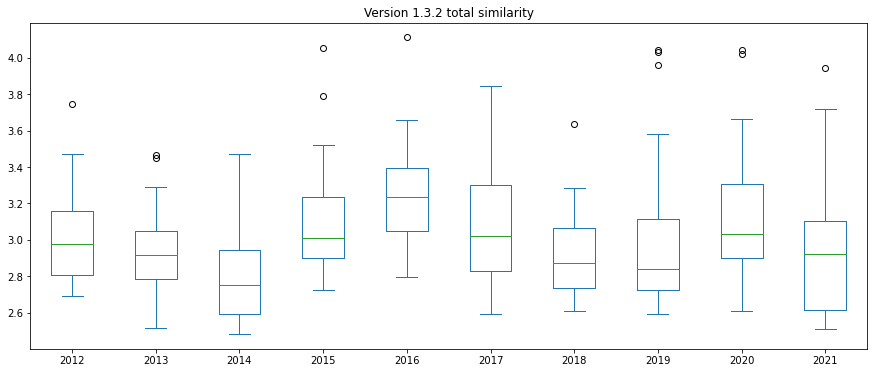

In [76]:
df_index_add_v3_progression.plot.box(title = 'Version 1.3.2 total similarity', figsize = (15, 6))

## Version 2.1.1: First chord weights heavier; Sentence as unit; No chord simplification

In [77]:
similarity_dict_whole_v2_sentence = {}
similarity_dict_add_v2_sentence = {}
similarity_matrix_dict_v2_1_1 = {}
for year in range(2012, 2022):
    verse_similarity_index, chorus_similarity_index = [], []
    verse = copy.deepcopy(progression_dict_sentence[str(year)+'verse'])
    chorus = copy.deepcopy(progression_dict_sentence[str(year)+'chorus'])
    #verse similarity calculation
    for i in verse: # i songs
        while (['nan'] in i):
            i.pop()
    verse_similarity_matrix = np.zeros((len(verse), len(verse))) #compare similarity 2 by 2 and form a matrix
    for i in range(0, len(verse)):
        for j in range(0, len(verse)):
            if i==j:
                verse_similarity_matrix[i][j] = float('inf')
            else:             
                verse_similarity_matrix[i][j] = similarity_index_v1(verse[i], verse[j], 0.5, 0.5)[0]
    #chorus similarity calculation
    for i in chorus: # i songs
        while (['nan'] in i):
            i.pop()
    chorus_similarity_matrix = np.zeros((len(chorus), len(chorus))) #compare similarity 2 by 2 and form a matrix
    for i in range(0, len(chorus)):
        for j in range(0, len(chorus)):
            if i==j:
                chorus_similarity_matrix[i][j] = float('inf')
            else:
                chorus_similarity_matrix[i][j] = similarity_index_v1(chorus[i], chorus[j], 0.5, 0.5)[0]
    similarity_matrix_dict_v2_1_1[str(year)+'verse'] = np.count_nonzero(verse_similarity_matrix == 0)
    similarity_matrix_dict_v2_1_1[str(year)+'chorus'] = np.count_nonzero(chorus_similarity_matrix == 0)
    verse_transpose = verse_similarity_matrix.transpose() 
    chorus_transpose = chorus_similarity_matrix.transpose()  
    for row in verse_transpose:
        inf_index = np.argmax(row==float('inf'))
        new_row = np.delete(row, inf_index)
        verse_similarity_index.append(np.mean(new_row))
    for row in chorus_transpose:
        inf_index = np.argmax(row==float('inf'))
        new_row = np.delete(row, inf_index)
        chorus_similarity_index.append(np.mean(new_row))
    similarity_dict_add_v2_sentence[str(year)] = list(map(lambda x:x[0]+x[1], zip(verse_similarity_index,chorus_similarity_index)))
    similarity_dict_whole_v2_sentence[str(year)+'verse'] =  verse_similarity_index
    similarity_dict_whole_v2_sentence[str(year)+'chorus'] =  chorus_similarity_index

Text(0.5, 1.0, 'Exactly Same Chords in Each Year - Version 2.1.1')

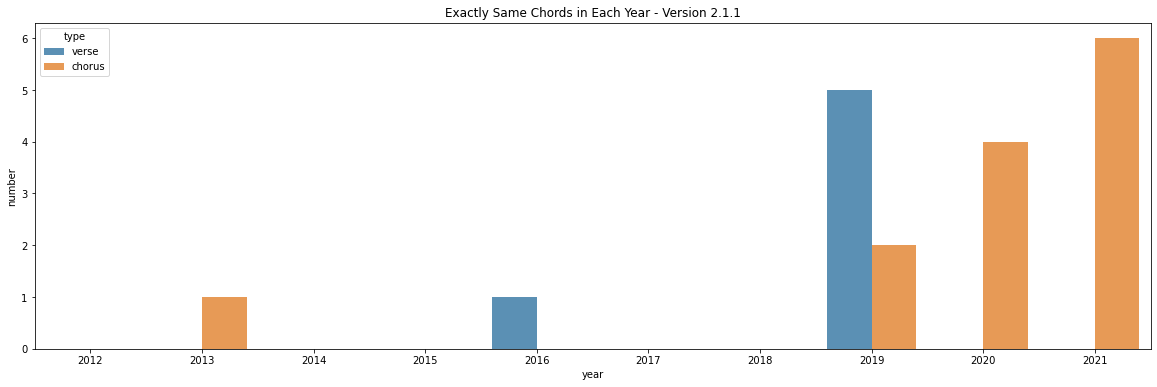

In [78]:
df_similarity_matrix_dict_v2_1_1 = []
for i in similarity_matrix_dict_v2_1_1.keys():
    year_list = []
    year_list.append(i[:4])
    year_list.append(i[4:])
    year_list.append(similarity_matrix_dict_v2_1_1[i])
    df_similarity_matrix_dict_v2_1_1.append(year_list)
df_similarity_matrix_v2_1_1 = pd.DataFrame(df_similarity_matrix_dict_v2_1_1,columns=['year','type','number'])
fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='year', y='number', hue = 'type', alpha = 0.8, data=df_similarity_matrix_v2_1_1)
ax.set_title('Exactly Same Chords in Each Year - Version 2.1.1')

In [79]:
df_index_whole_v2_sentence = pd.DataFrame(columns = similarity_dict_whole_v2_sentence.keys(), index=list(range(20)))
for i in similarity_dict_whole_v2_sentence.keys():
    for j in range(0, len(similarity_dict_whole_v2_sentence[i])):
        df_index_whole_v2_sentence[i][j] = similarity_dict_whole_v2_sentence[i][j]    
df_index_whole_v2_sentence

,2012verse,2012chorus,2013verse,2013chorus,2014verse,2014chorus,2015verse,2015chorus,2016verse,2016chorus,2017verse,2017chorus,2018verse,2018chorus,2019verse,2019chorus,2020verse,2020chorus,2021verse,2021chorus
0,1.815274,1.878573,1.502739,1.474408,1.585193,1.592345,1.816376,1.672093,1.859602,1.896581,1.823965,1.716787,1.427674,1.410766,2.350775,2.636115,1.909579,1.524971,1.303814,1.534387
1,1.799326,1.741202,1.813262,1.729883,1.595348,1.562241,1.534318,1.666571,2.159756,2.157125,1.936662,1.43434,1.547051,1.401164,1.582686,1.666208,1.344908,1.559173,1.207209,1.178367
2,1.51367,1.648117,1.651323,1.844621,1.566182,1.670824,1.755616,1.508561,1.816486,1.823609,2.048589,2.018428,1.39512,2.19637,1.816518,1.59282,1.568823,1.741998,1.395645,1.297593
3,1.698333,1.481046,1.545143,1.436551,1.778694,1.759364,1.808871,1.62026,1.651177,1.64107,1.507778,1.538062,2.033717,2.021025,1.620413,1.656326,1.57059,1.832732,1.874385,1.608235
4,1.543642,1.54867,1.958965,1.932984,1.418308,1.521505,1.715275,1.687717,1.458435,1.680324,1.531053,1.580495,1.450525,1.914132,1.561317,1.494846,1.411284,1.345271,1.748478,1.795372
5,1.591874,1.595923,1.656858,1.642299,2.082436,1.840483,1.857113,1.592251,1.607056,1.767443,1.550644,1.597447,1.408911,1.432057,1.572636,1.54521,1.186386,1.375497,1.886828,1.56993
6,1.92947,1.446008,1.512313,1.664589,2.259192,2.203216,1.629999,1.706734,1.614343,1.606956,1.842478,1.986036,2.305088,1.649938,1.987819,2.092451,1.650968,1.768814,1.544925,1.43258
7,1.914356,1.959173,1.804834,1.628188,1.475354,1.551689,1.65988,2.116587,1.741842,1.708829,1.686812,1.670107,1.567,1.447859,1.732725,2.555698,1.551494,1.620519,1.442375,1.388255
8,1.605676,1.524307,1.779959,1.670574,1.421649,1.573664,1.65208,1.490474,1.77592,1.80933,1.654977,1.63104,1.879119,1.575295,1.550621,1.710486,1.478516,1.554649,1.545744,1.255915
9,1.766706,1.641285,1.612814,2.366915,1.625163,1.571399,1.595812,1.607418,1.528752,1.510018,1.668091,1.715041,1.65562,1.591924,1.690859,1.491415,1.291114,1.421565,1.276982,1.356686


In [80]:
df_index_add_v2_sentence = pd.DataFrame(columns = similarity_dict_add_v2_sentence.keys(), index=list(range(20)))
for i in similarity_dict_add_v2_sentence.keys():
    for j in range(0, len(similarity_dict_add_v2_sentence[i])):
        df_index_add_v2_sentence[i][j] = similarity_dict_add_v2_sentence[i][j]    
df_index_add_v2_sentence

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,3.693848,2.977147,3.177539,3.488469,3.756183,3.540752,2.83844,4.98689,3.43455,2.838202
1,3.540528,3.543146,3.157589,3.200889,4.316882,3.371002,2.948215,3.248894,2.904081,2.385576
2,3.161788,3.495944,3.237005,3.264177,3.640095,4.067017,3.591491,3.409338,3.310822,2.693238
3,3.179379,2.981694,3.538058,3.429131,3.292247,3.04584,4.054742,3.276739,3.403322,3.48262
4,3.092312,3.89195,2.939814,3.402991,3.138759,3.111549,3.364657,3.056163,2.756555,3.54385
5,3.187797,3.299157,3.922918,3.449364,3.374499,3.14809,2.840969,3.117846,2.561883,3.456759
6,3.375478,3.176902,4.462409,3.336733,3.2213,3.828513,3.955026,4.08027,3.419782,2.977506
7,3.873529,3.433021,3.027043,3.776467,3.450671,3.356919,3.014859,4.288423,3.172013,2.83063
8,3.129982,3.450533,2.995313,3.142554,3.58525,3.286018,3.454414,3.261107,3.033165,2.801659
9,3.407992,3.979729,3.196562,3.203229,3.038769,3.383132,3.247544,3.182274,2.71268,2.633668


<AxesSubplot:title={'center':'Version 2.1.1 verse similarity'}>

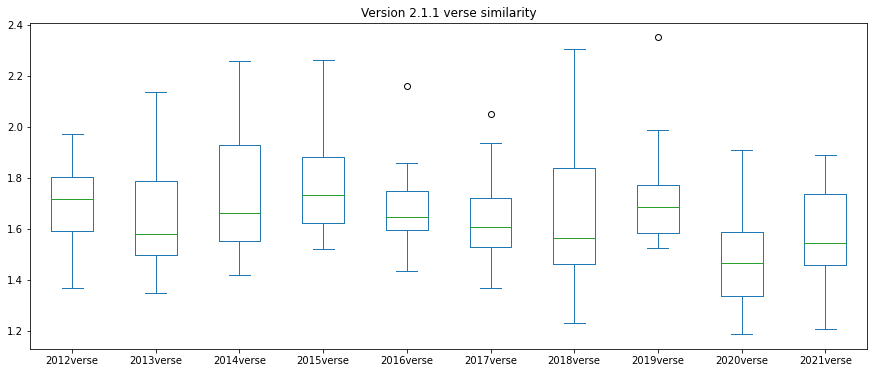

In [81]:
df_index_verse_v2_sentence = df_index_whole_v2_sentence[['2012verse','2013verse','2014verse','2015verse','2016verse', 
                                                        '2017verse', '2018verse','2019verse','2020verse','2021verse']]
df_index_verse_v2_sentence.plot.box(title = 'Version 2.1.1 verse similarity', figsize = (15, 6))

<AxesSubplot:title={'center':'Version 2.1.1 chorus similarity'}>

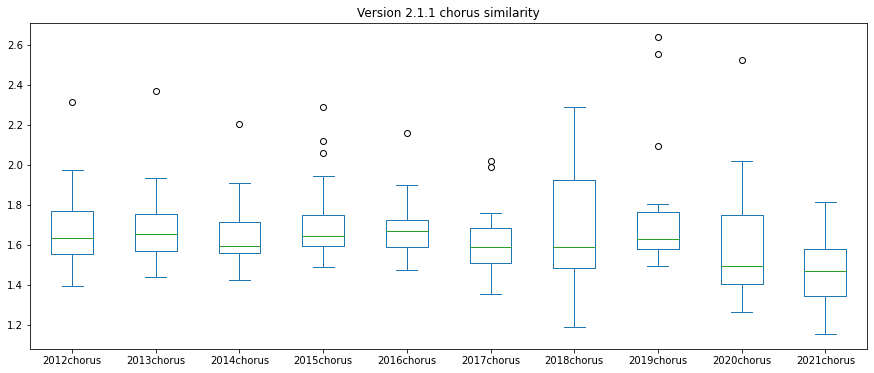

In [82]:
df_index_chorus_v2_sentence = df_index_whole_v2_sentence[['2012chorus','2013chorus','2014chorus','2015chorus','2016chorus', 
                                                        '2017chorus', '2018chorus','2019chorus','2020chorus','2021chorus']]
df_index_chorus_v2_sentence.plot.box(title = 'Version 2.1.1 chorus similarity', figsize = (15, 6))

<AxesSubplot:title={'center':'Version 2.1.1 total similarity'}>

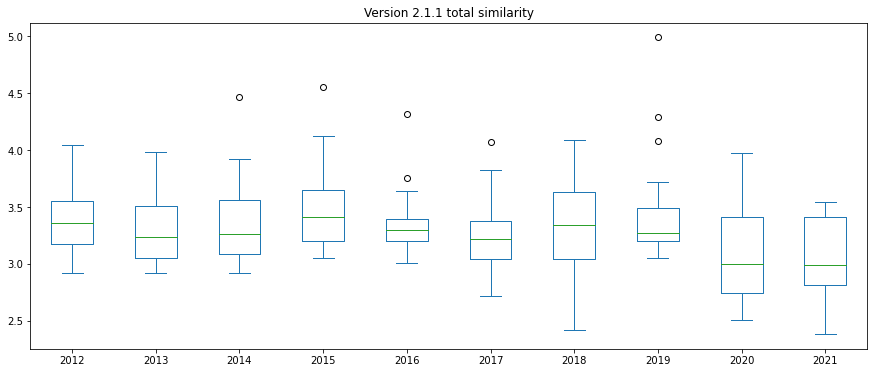

In [83]:
df_index_add_v2_sentence.plot.box(title = 'Version 2.1.1 total similarity', figsize = (15, 6))

## Version 2.1.2: First chord weights heavier; Progression as unit; No chord simplification

In [84]:
similarity_dict_whole_v2_progression = {}
similarity_dict_add_v2_progression = {}
similarity_matrix_dict_v2_1_2 = {}
for year in range(2012, 2022):
    verse_similarity_index, chorus_similarity_index = [], []
    verse = copy.deepcopy(progression_dict_combine[str(year)+'verse'])
    chorus = copy.deepcopy(progression_dict_combine[str(year)+'chorus'])
    #verse similarity calculation
    verse_similarity_matrix = np.zeros((len(verse), len(verse))) #compare similarity 2 by 2 and form a matrix
    for i in range(0, len(verse)):
        for j in range(0, len(verse)):
            if i == j:
                verse_similarity_matrix[i][j] = float('inf')
            else:
                verse_similarity_matrix[i][j] = similarity_index_v2(verse[i], verse[j], 0.5, 0.5)
    
    #chorus similarity calculation
    chorus_similarity_matrix = np.zeros((len(chorus), len(chorus))) #compare similarity 2 by 2 and form a matrix
    for i in range(0, len(chorus)):
        for j in range(0, len(chorus)):
            if i == j:
                chorus_similarity_matrix[i][j] = float('inf')
            else:
                chorus_similarity_matrix[i][j] = similarity_index_v2(chorus[i], chorus[j], 0.5, 0.5) 
    similarity_matrix_dict_v2_1_2[str(year)+'verse'] = np.count_nonzero(verse_similarity_matrix == 0)
    similarity_matrix_dict_v2_1_2[str(year)+'chorus'] = np.count_nonzero(chorus_similarity_matrix == 0)
    verse_transpose = verse_similarity_matrix.transpose() 
    chorus_transpose = chorus_similarity_matrix.transpose()  
    for row in verse_transpose:
        inf_index = np.argmax(row==float('inf'))
        new_row = np.delete(row, inf_index)
        verse_similarity_index.append(np.mean(new_row))
    for row in chorus_transpose:
        inf_index = np.argmax(row==float('inf'))
        new_row = np.delete(row, inf_index)
        chorus_similarity_index.append(np.mean(new_row))
    similarity_dict_add_v2_progression[str(year)] = list(map(lambda x:x[0]+x[1], zip(verse_similarity_index,chorus_similarity_index)))
    similarity_dict_whole_v2_progression[str(year)+'verse'] =  verse_similarity_index
    similarity_dict_whole_v2_progression[str(year)+'chorus'] =  chorus_similarity_index

Text(0.5, 1.0, 'Exactly Same Chords in Each Year - Version 2.1.2')

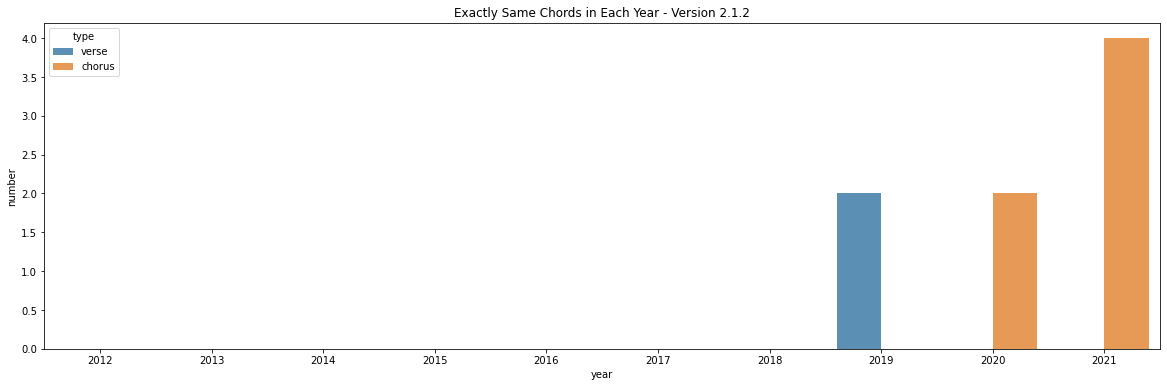

In [85]:
df_similarity_matrix_dict_v2_1_2 = []
for i in similarity_matrix_dict_v2_1_2.keys():
    year_list = []
    year_list.append(i[:4])
    year_list.append(i[4:])
    year_list.append(similarity_matrix_dict_v2_1_2[i])
    df_similarity_matrix_dict_v2_1_2.append(year_list)
df_similarity_matrix_v2_1_2 = pd.DataFrame(df_similarity_matrix_dict_v2_1_2,columns=['year','type','number'])
fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='year', y='number', hue = 'type', alpha = 0.8, data=df_similarity_matrix_v2_1_2)
ax.set_title('Exactly Same Chords in Each Year - Version 2.1.2')

In [86]:
df_index_whole_v2_progression = pd.DataFrame(columns = similarity_dict_whole_v2_progression.keys(), index=list(range(20)))
for i in similarity_dict_whole_v2_progression.keys():
    for j in range(0, len(similarity_dict_whole_v2_progression[i])):
        df_index_whole_v2_progression[i][j] = similarity_dict_whole_v2_progression[i][j]    
df_index_whole_v2_progression

,2012verse,2012chorus,2013verse,2013chorus,2014verse,2014chorus,2015verse,2015chorus,2016verse,2016chorus,2017verse,2017chorus,2018verse,2018chorus,2019verse,2019chorus,2020verse,2020chorus,2021verse,2021chorus
0,2.049476,2.18097,1.652924,1.812207,1.958346,1.862522,2.202895,2.106902,2.401917,2.261234,2.332592,2.03491,1.589292,1.598447,3.036164,3.402811,2.243884,1.817475,1.457402,1.907153
1,2.104424,2.068689,2.156466,1.925123,1.858405,1.867453,1.698758,1.931356,2.562501,2.561181,2.225223,1.713988,1.450414,1.532407,1.88559,2.054461,1.64942,2.113031,1.422945,1.393535
2,1.524704,1.722735,2.077571,2.343134,1.820476,2.107065,2.062575,1.61498,2.458498,2.502256,2.572468,2.512277,1.457438,2.453248,2.237404,1.878868,1.739924,2.019075,1.707083,1.554577
3,1.577424,1.872989,1.665594,1.751985,2.234399,2.140493,2.03138,1.961288,1.731687,1.824919,1.795685,1.74222,2.264951,2.32516,1.961583,1.972949,2.081487,2.113555,2.358546,1.957191
4,1.723518,1.798812,2.466518,2.430535,1.662739,1.805969,1.734242,1.636249,1.656351,2.11617,1.910748,1.961737,2.041001,2.321711,1.726357,1.740726,1.505773,1.487113,1.941122,1.910377
5,1.655295,1.749562,1.984601,1.927689,2.628247,2.154491,2.334179,1.925477,1.967749,2.043759,1.746312,1.946476,1.384645,1.616265,2.069355,2.206779,1.291275,1.631619,2.360779,1.851457
6,2.075422,1.907358,1.730869,1.854996,2.687772,2.607879,2.109822,1.809906,1.929352,2.076923,2.264816,2.173552,3.059263,2.180981,2.493982,2.379825,1.882969,2.074674,1.875509,1.757844
7,2.406717,2.534507,2.227338,1.787521,1.702292,1.928262,1.918765,2.460401,2.084668,2.026185,2.065116,1.661689,1.614865,1.750965,2.019958,3.074264,1.898499,2.032055,1.616068,1.510038
8,1.475926,1.911674,1.875373,1.78606,1.722228,1.861516,1.919723,1.870735,2.092564,2.124599,1.846493,1.669017,2.031805,1.817243,1.921491,2.057968,1.458981,1.885903,1.555672,1.330225
9,1.822725,1.803908,2.179115,2.839797,1.901132,1.798578,1.751382,1.792372,1.69877,1.796965,1.892656,2.10365,1.862068,2.093435,1.999385,1.785093,1.656632,1.627895,1.460661,1.553161


In [87]:
df_index_add_v2_progression = pd.DataFrame(columns = similarity_dict_add_v2_progression.keys(), index=list(range(20)))
for i in similarity_dict_add_v2_progression.keys():
    for j in range(0, len(similarity_dict_add_v2_progression[i])):
        df_index_add_v2_progression[i][j] = similarity_dict_add_v2_progression[i][j]    
df_index_add_v2_progression

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,4.230447,3.465131,3.820868,4.309797,4.663151,4.367502,3.187739,6.438975,4.061359,3.364555
1,4.173113,4.081589,3.725858,3.630114,5.123681,3.939211,2.982821,3.940052,3.762452,2.816479
2,3.247439,4.420705,3.927541,3.677554,4.960753,5.084746,3.910686,4.116273,3.758999,3.26166
3,3.450413,3.417578,4.374892,3.992668,3.556606,3.537904,4.590111,3.934532,4.195042,4.315737
4,3.52233,4.897053,3.468707,3.370491,3.772521,3.872485,4.362712,3.467083,2.992886,3.851499
5,3.404857,3.912291,4.782738,4.259656,4.011508,3.692787,3.000909,4.276134,2.922894,4.212236
6,3.98278,3.585865,5.295651,3.919727,4.006275,4.438368,5.240244,4.873807,3.957643,3.633353
7,4.941224,4.014859,3.630553,4.379166,4.110852,3.726806,3.36583,5.094221,3.930553,3.126106
8,3.3876,3.661433,3.583744,3.790457,4.217163,3.51551,3.849048,3.979459,3.344884,2.885897
9,3.626632,5.018912,3.69971,3.543754,3.495735,3.996306,3.955503,3.784477,3.284527,3.013822


<AxesSubplot:title={'center':'Version 2.1.2 verse similarity'}>

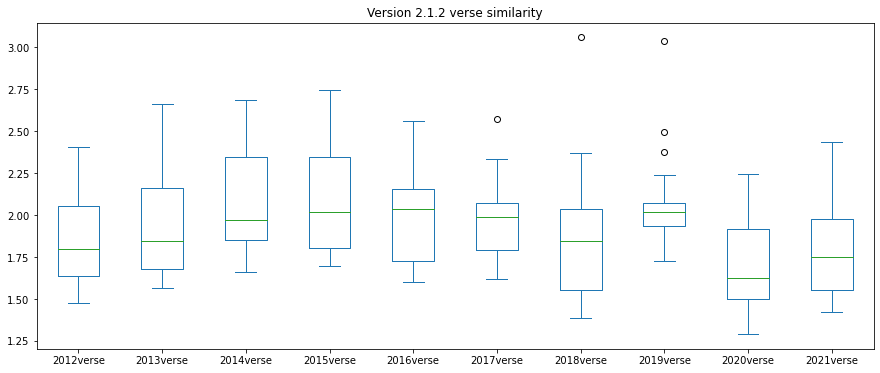

In [88]:
df_index_verse_v2_progression = df_index_whole_v2_progression[['2012verse','2013verse','2014verse','2015verse','2016verse', 
                                                               '2017verse', '2018verse','2019verse','2020verse','2021verse']]
df_index_verse_v2_progression.plot.box(title = 'Version 2.1.2 verse similarity', figsize = (15, 6))

<AxesSubplot:title={'center':'Version 2.1.2 chorus similarity'}>

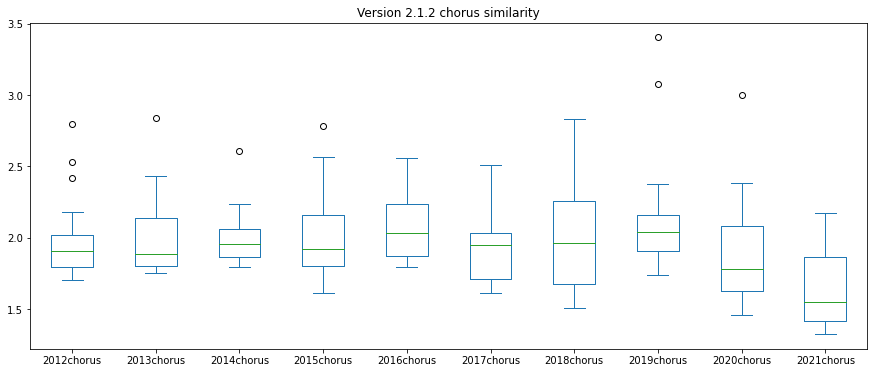

In [89]:
df_index_chorus_v2_progression = df_index_whole_v2_progression[['2012chorus','2013chorus','2014chorus','2015chorus','2016chorus', 
                                                                '2017chorus', '2018chorus','2019chorus','2020chorus','2021chorus']]
df_index_chorus_v2_progression.plot.box(title = 'Version 2.1.2 chorus similarity', figsize = (15, 6))

<AxesSubplot:title={'center':'Version 2.1.2 total similarity'}>

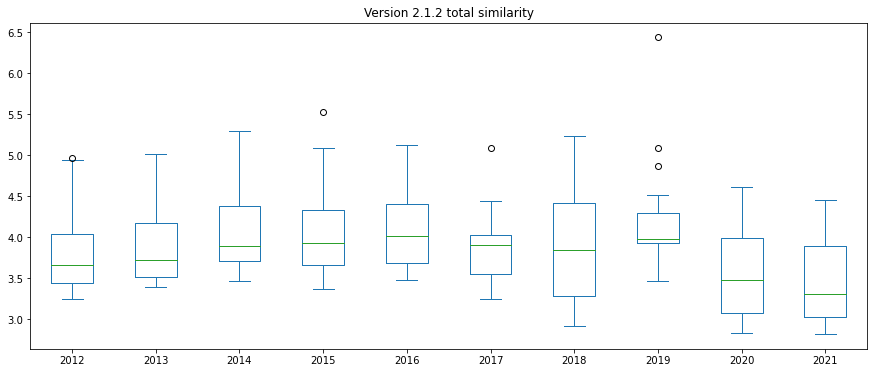

In [90]:
df_index_add_v2_progression.plot.box(title = 'Version 2.1.2 total similarity', figsize = (15, 6))

## Version 2.2.1: First chord weights heavier; Sentence as unit; Chord simplification

In [91]:
simplified_similarity_whole_v2_sentence = {}
simplified_similarity_add_v2_sentence = {}
similarity_matrix_dict_v2_2_1 = {}
for year in range(2012, 2022):
    verse_similarity_index, chorus_similarity_index = [], []
    verse = copy.deepcopy(simplified_dict_sentence[str(year)+'verse'])
    chorus = copy.deepcopy(simplified_dict_sentence[str(year)+'chorus'])
    #verse similarity calculation
    for i in verse: # i songs
        while (['nan'] in i):
            i.pop()
    verse_similarity_matrix = np.zeros((len(verse), len(verse))) #compare similarity 2 by 2 and form a matrix
    for i in range(0, len(verse)):
        for j in range(0, len(verse)):
            if i==j:
                verse_similarity_matrix[i][j] = float('inf')
            else:
                verse_similarity_matrix[i][j] = similarity_index_v1(verse[i], verse[j], 0.5, 0.5)[0]
    #chorus similarity calculation
    for i in chorus: # i songs
        while (['nan'] in i):
            i.pop()
    chorus_similarity_matrix = np.zeros((len(chorus), len(chorus))) #compare similarity 2 by 2 and form a matrix
    for i in range(0, len(chorus)):
        for j in range(0, len(chorus)):
            if i == j:
                chorus_similarity_matrix[i][j] = float('inf')
            else:
                chorus_similarity_matrix[i][j] = similarity_index_v1(chorus[i], chorus[j], 0.5, 0.5)[0]
    similarity_matrix_dict_v2_2_1[str(year)+'verse'] = np.count_nonzero(verse_similarity_matrix == 0)
    similarity_matrix_dict_v2_2_1[str(year)+'chorus'] = np.count_nonzero(chorus_similarity_matrix == 0)
    verse_transpose = verse_similarity_matrix.transpose() 
    chorus_transpose = chorus_similarity_matrix.transpose()  
    for row in verse_transpose:
        inf_index = np.argmax(row==float('inf'))
        new_row = np.delete(row, inf_index)
        verse_similarity_index.append(np.mean(new_row))
    for row in chorus_transpose:
        inf_index = np.argmax(row==float('inf'))
        new_row = np.delete(row, inf_index)
        chorus_similarity_index.append(np.mean(new_row))
        chorus_similarity_index.append(min(row))
    simplified_similarity_add_v2_sentence[str(year)] = list(map(lambda x:x[0]+x[1], zip(verse_similarity_index,chorus_similarity_index)))
    simplified_similarity_whole_v2_sentence[str(year)+'verse'] =  verse_similarity_index
    simplified_similarity_whole_v2_sentence[str(year)+'chorus'] =  chorus_similarity_index

Text(0.5, 1.0, 'Exactly Same Chords in Each Year - Version 2.2.1')

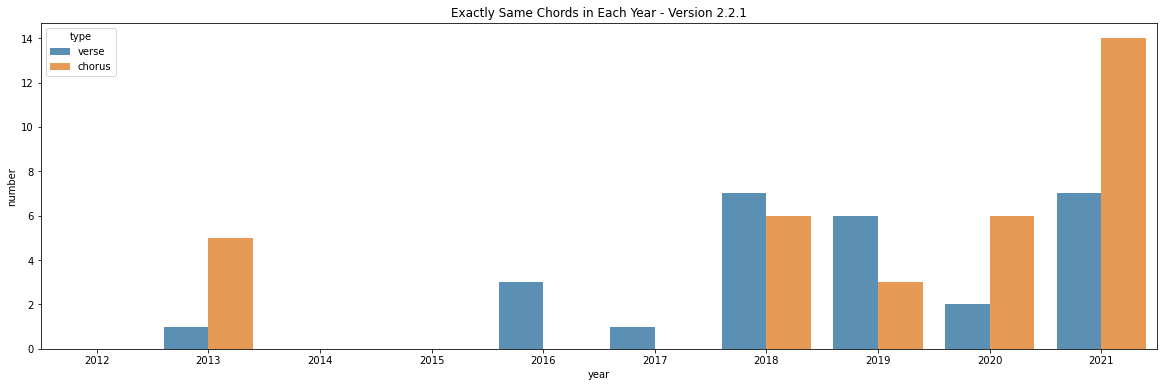

In [92]:
df_similarity_matrix_dict_v2_2_1 = []
for i in similarity_matrix_dict_v2_2_1.keys():
    year_list = []
    year_list.append(i[:4])
    year_list.append(i[4:])
    year_list.append(similarity_matrix_dict_v2_2_1[i])
    df_similarity_matrix_dict_v2_2_1.append(year_list)
df_similarity_matrix_v2_2_1 = pd.DataFrame(df_similarity_matrix_dict_v2_2_1,columns=['year','type','number'])
fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='year', y='number', hue = 'type', alpha = 0.8, data=df_similarity_matrix_v2_2_1)
ax.set_title('Exactly Same Chords in Each Year - Version 2.2.1')

In [93]:
df_simplified_whole_v2_sentence = pd.DataFrame(columns = simplified_similarity_whole_v2_sentence.keys(), index=list(range(20)))
for i in simplified_similarity_whole_v2_sentence.keys():
    for j in range(0, len(simplified_similarity_whole_v2_sentence[i])):
        df_simplified_whole_v2_sentence[i][j] = simplified_similarity_whole_v2_sentence[i][j]    
df_simplified_whole_v2_sentence

,2012verse,2012chorus,2013verse,2013chorus,2014verse,2014chorus,2015verse,2015chorus,2016verse,2016chorus,2017verse,2017chorus,2018verse,2018chorus,2019verse,2019chorus,2020verse,2020chorus,2021verse,2021chorus
0,1.878997,1.919269,1.625691,1.428252,1.577973,1.608847,1.849018,1.659312,1.766626,1.753075,2.006826,1.930083,1.467175,1.452857,2.391848,2.614368,1.718101,1.417738,1.194118,1.336544
1,1.955885,1.339466,1.36068,0.0,1.560695,1.291565,1.526433,0.421473,2.219185,0.879901,1.927325,1.591593,1.526387,0.483068,1.604828,2.407149,1.294303,0.643257,1.127915,0.445626
2,1.518933,1.804848,1.600616,1.288255,1.522561,1.514431,1.770022,1.681453,1.783208,2.210122,1.886493,1.383415,1.335305,1.342815,1.755585,1.694822,1.600386,1.711394,1.307066,1.118401
3,1.756986,1.083031,1.427272,0.0,1.876666,0.496526,1.855698,0.495642,1.708467,1.758752,1.518993,0.337936,2.043918,0.0,1.708079,0.392867,1.30331,0.977221,1.581254,0.0
4,1.553726,1.714069,1.420433,1.821768,1.344567,1.633297,1.731379,1.610237,1.430467,1.803259,1.528997,1.860641,1.41678,2.224498,1.679715,1.555959,1.288052,1.873799,1.798638,1.267481
5,1.597657,1.171763,1.550952,0.984216,2.120173,0.74498,1.858704,1.188323,1.673026,1.347204,1.602168,1.200934,1.335305,1.854932,1.558332,0.23943,1.163147,1.458062,1.903569,0.428838
6,1.9259,1.506697,1.541541,1.37596,2.29791,1.595982,1.625654,1.680582,1.485337,1.712486,1.821833,1.601322,2.325774,2.042198,1.970785,1.750504,1.755326,1.462981,1.498923,1.553935
7,1.92998,0.643257,1.841062,0.0,1.448169,1.194114,1.768401,1.062457,1.803174,1.378115,1.714731,1.157568,1.471542,1.366813,1.763249,1.401821,1.628,0.62705,1.433115,0.462139
8,1.651256,1.526327,1.818311,1.537398,1.2913,1.394256,1.764472,1.706669,1.783212,1.61126,1.710075,1.596434,1.902884,1.910352,1.584166,1.531348,1.645508,1.256404,1.555613,1.857248
9,1.752497,0.390799,1.550192,0.78271,1.815458,0.437007,1.604078,0.888932,1.656254,0.643257,1.792176,0.655511,1.607041,1.486311,1.729293,0.568753,1.339211,0.321629,1.285332,1.534233


In [94]:
df_simplified_add_v2_sentence = pd.DataFrame(columns = simplified_similarity_add_v2_sentence.keys(), index=list(range(20)))
for i in simplified_similarity_add_v2_sentence.keys():
    for j in range(0, len(simplified_similarity_add_v2_sentence[i])):
        df_simplified_add_v2_sentence[i][j] = simplified_similarity_add_v2_sentence[i][j]    
df_simplified_add_v2_sentence

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,3.798266,3.053944,3.186821,3.508329,3.519701,3.936909,2.920031,5.006216,3.135839,2.530662
1,3.295351,1.36068,2.85226,1.947906,3.099086,3.518918,2.009454,4.011977,1.93756,1.573541
2,3.323781,2.888872,3.036993,3.451475,3.993331,3.269908,2.67812,3.450407,3.31178,2.425467
3,2.840016,1.427272,2.373192,2.35134,3.467219,1.856929,2.043918,2.100946,2.280531,1.581254
4,3.267795,3.242201,2.977864,3.341616,3.233726,3.389638,3.641278,3.235674,3.161851,3.066119
5,2.76942,2.535167,2.865153,3.047026,3.020229,2.803102,3.190237,1.797761,2.621209,2.332407
6,3.432597,2.917501,3.893892,3.306235,3.197823,3.423155,4.367972,3.721289,3.218307,3.052858
7,2.573237,1.841062,2.642283,2.830858,3.181288,2.872299,2.838355,3.165069,2.25505,1.895254
8,3.177583,3.355709,2.685556,3.471141,3.394471,3.306509,3.813236,3.115514,2.901912,3.412861
9,2.143295,2.332903,2.252465,2.493011,2.299511,2.447687,3.093352,2.298046,1.66084,2.819565


<AxesSubplot:title={'center':'Version 2.2.1 verse similarity'}>

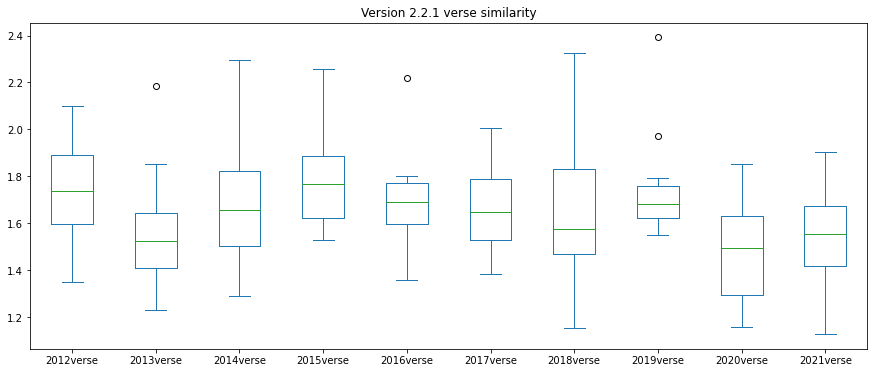

In [95]:
df_simplified_verse_whole_v2_sentence = df_simplified_whole_v2_sentence[['2012verse','2013verse','2014verse','2015verse','2016verse', 
                                                                        '2017verse', '2018verse','2019verse','2020verse','2021verse']]
df_simplified_verse_whole_v2_sentence.plot.box(title = 'Version 2.2.1 verse similarity', figsize = (15, 6))

<AxesSubplot:title={'center':'Version 2.2.1 chorus similarity'}>

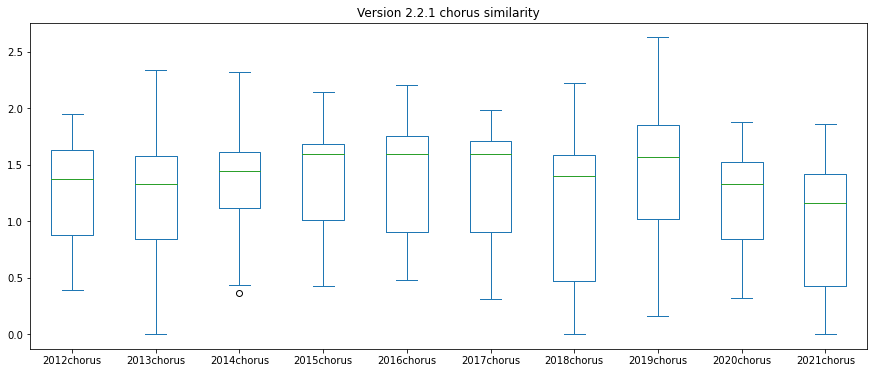

In [96]:
df_simplified_chorus_v2_sentence = df_simplified_whole_v2_sentence[['2012chorus','2013chorus','2014chorus','2015chorus','2016chorus', 
                                                                    '2017chorus', '2018chorus','2019chorus','2020chorus','2021chorus']]
df_simplified_chorus_v2_sentence.plot.box(title = 'Version 2.2.1 chorus similarity', figsize = (15, 6))

<AxesSubplot:title={'center':'Version 2.2.1 total similarity'}>

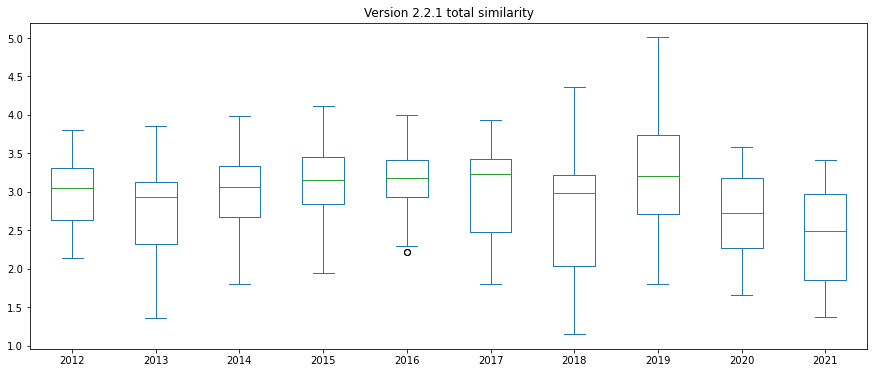

In [97]:
df_simplified_add_v2_sentence.plot.box(title = 'Version 2.2.1 total similarity', figsize = (15, 6))

## Version 2.2.2: First chord weights heavier; Progression as unit; Chord simplification

In [98]:
simplified_similarity_whole_v2_progression = {}
simplified_similarity_add_v2_progression = {}
similarity_matrix_dict_v2_2_2 = {}
for year in range(2012, 2022):
    verse_similarity_index, chorus_similarity_index = [], []
    verse = copy.deepcopy(simplified_dict_combine[str(year)+'verse'])
    chorus = copy.deepcopy(simplified_dict_combine[str(year)+'chorus'])
    #verse similarity calculation
    verse_similarity_matrix = np.zeros((len(verse), len(verse))) #compare similarity 2 by 2 and form a matrix
    for i in range(0, len(verse)):
        for j in range(0, len(verse)):
            if i == j:
                verse_similarity_matrix[i][j] = float('inf')
            else:
                verse_similarity_matrix[i][j] = similarity_index_v2(verse[i], verse[j], 0.5, 0.5)
    
    #chorus similarity calculation
    chorus_similarity_matrix = np.zeros((len(chorus), len(chorus))) #compare similarity 2 by 2 and form a matrix
    for i in range(0, len(chorus)):
        for j in range(0, len(chorus)):
            if i == j:
                chorus_similarity_matrix[i][j] = float('inf')
            else:
                chorus_similarity_matrix[i][j] = similarity_index_v2(chorus[i], chorus[j], 0.5, 0.5) 
    similarity_matrix_dict_v2_2_2[str(year)+'verse'] = np.count_nonzero(verse_similarity_matrix == 0)
    similarity_matrix_dict_v2_2_2[str(year)+'chorus'] = np.count_nonzero(chorus_similarity_matrix == 0)
    verse_transpose = verse_similarity_matrix.transpose() 
    chorus_transpose = chorus_similarity_matrix.transpose()  
    for row in verse_transpose:
        inf_index = np.argmax(row==float('inf'))
        new_row = np.delete(row, inf_index)
        verse_similarity_index.append(np.mean(new_row))
    for row in chorus_transpose:
        inf_index = np.argmax(row==float('inf'))
        new_row = np.delete(row, inf_index)
        chorus_similarity_index.append(np.mean(new_row))
    simplified_similarity_add_v2_progression[str(year)]=list(map(lambda x:x[0]+x[1],zip(verse_similarity_index,chorus_similarity_index)))
    simplified_similarity_whole_v2_progression[str(year)+'verse'] =  verse_similarity_index
    simplified_similarity_whole_v2_progression[str(year)+'chorus'] =  chorus_similarity_index

Text(0.5, 1.0, 'Exactly Same Chords in Each Year - Version 2.2.2')

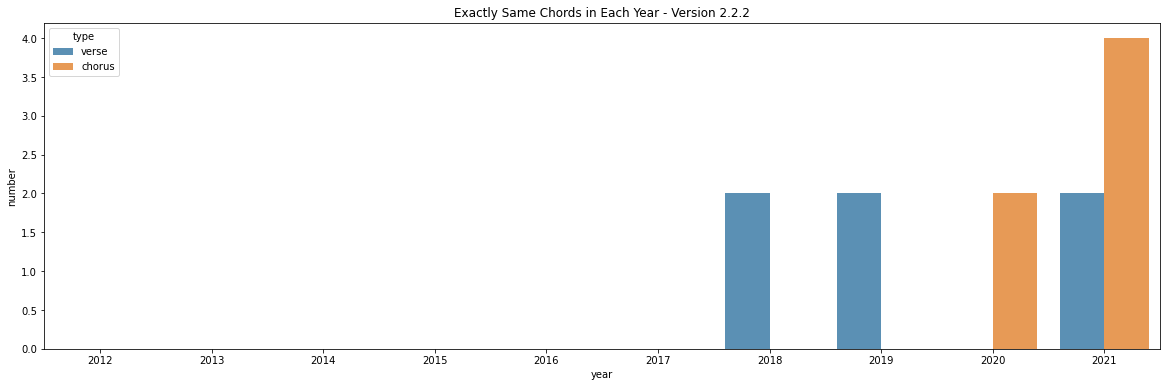

In [99]:
df_similarity_matrix_dict_v2_2_2 = []
for i in similarity_matrix_dict_v2_2_2.keys():
    year_list = []
    year_list.append(i[:4])
    year_list.append(i[4:])
    year_list.append(similarity_matrix_dict_v2_2_2[i])
    df_similarity_matrix_dict_v2_2_2.append(year_list)
df_similarity_matrix_v2_2_2 = pd.DataFrame(df_similarity_matrix_dict_v2_2_2,columns=['year','type','number'])
fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='year', y='number', hue = 'type', alpha = 0.8, data=df_similarity_matrix_v2_2_2)
ax.set_title('Exactly Same Chords in Each Year - Version 2.2.2')

In [100]:
df_simplified_whole_v2_progression = pd.DataFrame(columns = simplified_similarity_whole_v2_progression.keys(), index=list(range(20)))
for i in simplified_similarity_whole_v2_progression.keys():
    for j in range(0, len(simplified_similarity_whole_v2_progression[i])):
        df_simplified_whole_v2_progression[i][j] = simplified_similarity_whole_v2_progression[i][j]    
df_simplified_whole_v2_progression

,2012verse,2012chorus,2013verse,2013chorus,2014verse,2014chorus,2015verse,2015chorus,2016verse,2016chorus,2017verse,2017chorus,2018verse,2018chorus,2019verse,2019chorus,2020verse,2020chorus,2021verse,2021chorus
0,2.115507,2.197471,1.75848,1.880005,1.897388,1.830044,2.271074,2.104727,2.149791,1.870018,2.6575,2.384841,1.611403,1.617254,2.980408,3.356042,2.074326,1.99598,1.424817,1.432416
1,2.249168,2.147997,1.620231,1.500918,1.771242,1.798293,1.719195,2.012908,2.628815,2.60932,2.180731,1.754836,1.441673,1.559332,1.90621,2.090313,1.745216,2.208873,1.366581,1.328101
2,1.562513,1.710555,2.131196,2.105828,1.784064,2.054129,2.124967,1.635844,2.448074,2.496771,2.260012,2.19468,1.348413,2.44153,2.177881,1.815252,1.812744,2.173545,1.621684,1.551109
3,1.739368,1.931225,1.532826,1.53786,2.413913,1.774824,2.071956,1.767831,2.214975,2.205601,1.756495,1.818839,2.237652,2.332546,2.034755,2.05722,2.210717,1.710004,1.865793,1.859343
4,1.756127,1.752545,1.785944,1.840793,1.624512,1.764828,1.778759,1.667522,1.67558,2.054512,1.924801,2.075145,1.685878,2.311196,1.723071,1.724806,1.4463,1.542928,1.971854,1.991948
5,1.750152,1.767205,1.841169,1.776567,2.623386,2.138763,2.37029,1.805266,2.156017,2.065909,1.77898,1.9279,1.348413,1.666233,2.009848,2.225175,1.337606,1.626958,2.381698,1.93103
6,2.09689,1.937023,1.723445,1.85592,2.694079,2.754984,2.164908,2.029539,1.76539,1.834321,2.217315,2.173075,2.899147,2.351269,2.440899,2.416502,1.991671,2.158396,1.530703,1.688602
7,2.427851,2.528871,2.216249,1.704591,1.670855,1.855581,2.105461,2.499926,2.160353,2.053693,2.048968,1.695521,1.563771,1.701626,2.039557,3.226489,2.175597,2.303924,1.599284,1.565147
8,1.525103,1.703678,1.929729,1.799443,1.721438,1.844709,1.970997,2.106921,2.133477,2.109257,1.893133,1.706285,1.98364,1.792196,1.944222,2.092173,1.574976,2.001275,1.530433,1.385936
9,1.839984,1.776506,1.845228,2.796053,2.132502,1.809394,1.748172,1.764867,1.809492,1.857265,2.075097,2.294767,1.691236,1.746273,1.990624,1.798214,1.760572,1.645296,1.44006,1.63753


In [101]:
df_simplified_add_v2_progression = pd.DataFrame(columns = simplified_similarity_add_v2_progression.keys(), index=list(range(20)))
for i in simplified_similarity_add_v2_progression.keys():
    for j in range(0, len(simplified_similarity_add_v2_progression[i])):
        df_simplified_add_v2_progression[i][j] = simplified_similarity_add_v2_progression[i][j]    
df_simplified_add_v2_progression

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,4.312978,3.638485,3.727432,4.375801,4.019809,5.042341,3.228657,6.33645,4.070306,2.857233
1,4.397165,3.12115,3.569535,3.732103,5.238135,3.935567,3.001005,3.996523,3.954088,2.694682
2,3.273068,4.237024,3.838193,3.760811,4.944845,4.454693,3.789942,3.993133,3.986289,3.172793
3,3.670593,3.070686,4.188738,3.839787,4.420577,3.575334,4.570198,4.091974,3.920722,3.725136
4,3.508672,3.626737,3.38934,3.446281,3.730092,3.999945,3.997075,3.447877,2.989228,3.963801
5,3.517357,3.617736,4.762149,4.175556,4.221927,3.70688,3.014646,4.235023,2.964564,4.312727
6,4.033913,3.579365,5.449063,4.194448,3.599711,4.390389,5.250416,4.857401,4.150067,3.219305
7,4.956722,3.92084,3.526437,4.605387,4.214046,3.744489,3.265397,5.266046,4.47952,3.164431
8,3.22878,3.729172,3.566146,4.077918,4.242734,3.599418,3.775836,4.036395,3.576251,2.916369
9,3.61649,4.641282,3.941896,3.513038,3.666757,4.369864,3.437509,3.788838,3.405868,3.07759


<AxesSubplot:title={'center':'Version 2.2.2 verse similarity'}>

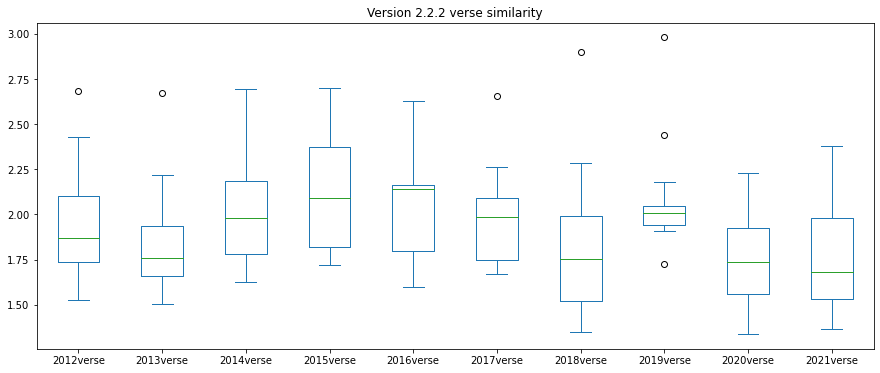

In [102]:
df_simplified_verse_whole_v2_progression=df_simplified_whole_v2_progression[['2012verse','2013verse','2014verse','2015verse','2016verse', 
                                                                        '2017verse', '2018verse','2019verse','2020verse','2021verse']]
df_simplified_verse_whole_v2_progression.plot.box(title = 'Version 2.2.2 verse similarity', figsize = (15, 6))

<AxesSubplot:title={'center':'Version 2.2.2 chorus similarity'}>

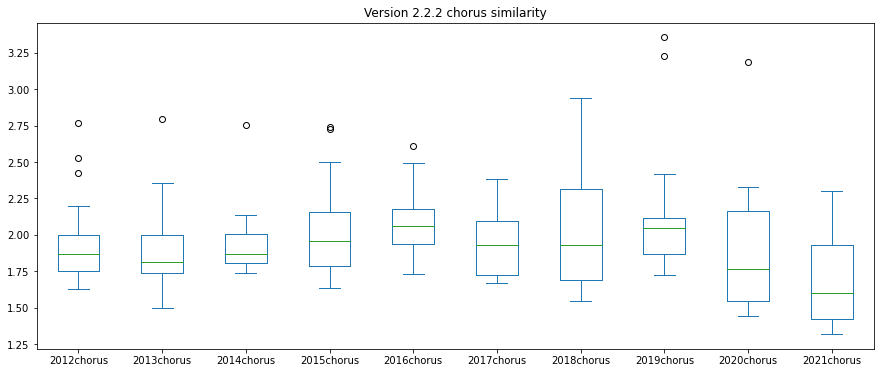

In [103]:
df_simplified_chorus_v2_progression=df_simplified_whole_v2_progression[['2012chorus','2013chorus','2014chorus','2015chorus','2016chorus', 
                                                                    '2017chorus', '2018chorus','2019chorus','2020chorus','2021chorus']]
df_simplified_chorus_v2_progression.plot.box(title = 'Version 2.2.2 chorus similarity', figsize = (15, 6))

<AxesSubplot:title={'center':'Version 2.2.2 total similarity'}>

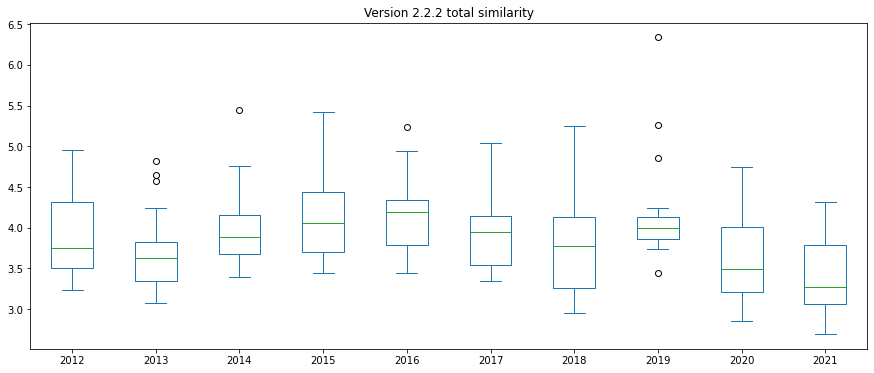

In [104]:
df_simplified_add_v2_progression.plot.box(title = 'Version 2.2.2 total similarity', figsize = (15, 6))

## Version 2.3.1: First chord weights heavier; Sentence as unit; Root transition

In [105]:
root_similarity_dict_whole_v3_sentence = {}
root_similarity_dict_add_v3_sentence = {}
similarity_matrix_dict_v2_3_1 = {}
for year in range(2012, 2022):
    verse_similarity_index, chorus_similarity_index = [], []
    verse = copy.deepcopy(progression_dict_sentence[str(year)+'verse'])
    chorus = copy.deepcopy(progression_dict_sentence[str(year)+'chorus'])
    #verse similarity calculation
    for i in verse: # i songs
        while (['nan'] in i):
            i.pop()
    verse_similarity_matrix = np.zeros((len(verse), len(verse))) #compare similarity 2 by 2 and form a matrix
    for i in range(0, len(verse)):
        for j in range(0, len(verse)):
            if i==j:
                verse_similarity_matrix[i][j] = float('inf')
            else:             
                verse_similarity_matrix[i][j] = root_similarity_index_v1(verse[i], verse[j], 0.5, 0.5)[0]
    #chorus similarity calculation
    for i in chorus: # i songs
        while (['nan'] in i):
            i.pop()
    chorus_similarity_matrix = np.zeros((len(chorus), len(chorus))) #compare similarity 2 by 2 and form a matrix
    for i in range(0, len(chorus)):
        for j in range(0, len(chorus)):
            if i==j:
                chorus_similarity_matrix[i][j] = float('inf')
            else:
                chorus_similarity_matrix[i][j] = root_similarity_index_v1(chorus[i], chorus[j], 0.5, 0.5)[0]
    similarity_matrix_dict_v2_3_1[str(year)+'verse'] = np.count_nonzero(verse_similarity_matrix == 0)
    similarity_matrix_dict_v2_3_1[str(year)+'chorus'] = np.count_nonzero(chorus_similarity_matrix == 0)
    verse_transpose = verse_similarity_matrix.transpose() 
    chorus_transpose = chorus_similarity_matrix.transpose()  
    for row in verse_transpose:
        inf_index = np.argmax(row==float('inf'))
        new_row = np.delete(row, inf_index)
        verse_similarity_index.append(np.mean(new_row))
    for row in chorus_transpose:
        inf_index = np.argmax(row==float('inf'))
        new_row = np.delete(row, inf_index)
        chorus_similarity_index.append(np.mean(new_row))
    root_similarity_dict_add_v3_sentence[str(year)] = list(map(lambda x:x[0]+x[1], zip(verse_similarity_index,chorus_similarity_index)))
    root_similarity_dict_whole_v3_sentence[str(year)+'verse'] =  verse_similarity_index
    root_similarity_dict_whole_v3_sentence[str(year)+'chorus'] =  chorus_similarity_index

Text(0.5, 1.0, 'Exactly Same Chords in Each Year - Version 2.3.1')

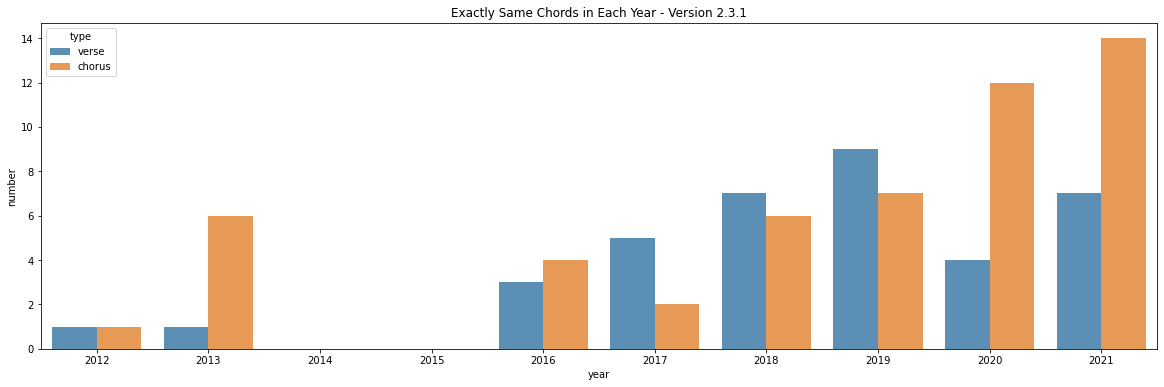

In [106]:
df_similarity_matrix_dict_v2_3_1 = []
for i in similarity_matrix_dict_v2_3_1.keys():
    year_list = []
    year_list.append(i[:4])
    year_list.append(i[4:])
    year_list.append(similarity_matrix_dict_v2_3_1[i])
    df_similarity_matrix_dict_v2_3_1.append(year_list)
df_similarity_matrix_v2_3_1 = pd.DataFrame(df_similarity_matrix_dict_v2_3_1,columns=['year','type','number'])
fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='year', y='number', hue = 'type', alpha = 0.8, data=df_similarity_matrix_v2_3_1)
ax.set_title('Exactly Same Chords in Each Year - Version 2.3.1')

In [107]:
df_root_index_whole_v3_sentence = pd.DataFrame(columns = root_similarity_dict_whole_v3_sentence.keys(), index=list(range(20)))
for i in root_similarity_dict_whole_v3_sentence.keys():
    for j in range(0, len(root_similarity_dict_whole_v3_sentence[i])):
        df_root_index_whole_v3_sentence[i][j] = root_similarity_dict_whole_v3_sentence[i][j]    
df_root_index_whole_v3_sentence

,2012verse,2012chorus,2013verse,2013chorus,2014verse,2014chorus,2015verse,2015chorus,2016verse,2016chorus,2017verse,2017chorus,2018verse,2018chorus,2019verse,2019chorus,2020verse,2020chorus,2021verse,2021chorus
0,2.357421,2.389898,1.798687,1.765632,1.814097,1.927596,2.281114,1.71765,2.03712,2.31715,2.015469,1.920205,1.856312,2.265002,2.405004,2.308413,1.949782,1.754509,1.566693,1.749673
1,1.770628,2.059878,1.835578,1.630752,1.564447,1.894041,1.759141,1.790312,2.538016,2.547216,2.49996,1.799504,2.093027,1.786326,2.098175,2.07664,1.705146,1.863437,1.516297,1.490552
2,1.506788,2.335384,1.725901,1.87352,1.88035,2.000161,1.801153,1.914074,2.152385,2.218822,2.426509,2.394462,2.005515,2.675624,2.232569,1.855848,2.427307,2.246763,1.754288,1.681893
3,2.188934,1.791554,2.032865,1.65895,1.96682,1.914605,2.365931,2.108888,2.128202,2.163024,1.968161,2.166535,2.280423,2.297447,2.31326,2.327716,1.740965,1.4909,2.199679,2.172707
4,1.640618,1.720175,1.814563,1.979269,1.532044,1.840813,2.313506,2.265798,1.687266,1.90278,1.8096,1.91781,1.826245,2.504715,2.115536,2.07576,1.764607,1.447337,2.273679,2.321202
5,1.884458,1.986158,2.014192,2.036483,1.880724,2.111585,2.20833,1.837572,1.687599,2.425598,2.220021,2.072669,2.005515,2.031265,2.000126,1.793331,1.670328,1.488021,2.135968,1.909128
6,1.671095,1.609347,2.037563,2.152571,2.268734,2.219738,1.800276,1.788827,1.511082,1.847539,2.067739,2.316555,2.348481,2.383006,2.375911,2.230685,2.421496,2.328755,1.966378,1.863241
7,1.879073,1.930053,2.067791,2.238861,1.804997,1.699618,1.850271,2.266682,2.35258,2.289162,1.82896,2.175437,1.831428,1.666639,2.183127,1.955983,2.000946,2.079312,2.090086,2.048883
8,2.020611,1.837769,2.11083,1.970981,1.587358,1.749012,1.87834,1.888551,2.221476,2.39376,2.204199,2.378709,2.086002,1.876996,1.92873,2.141913,2.398849,1.921392,2.269393,1.65722
9,1.926672,1.973229,2.151906,1.906473,2.07102,2.049818,2.151162,2.138602,1.927356,1.954625,1.952578,2.227277,2.038612,1.815845,1.831861,1.685836,1.852917,1.644411,1.643787,1.713661


In [108]:
df_root_index_add_v3_sentence = pd.DataFrame(columns = root_similarity_dict_add_v3_sentence.keys(), index=list(range(20)))
for i in root_similarity_dict_add_v3_sentence.keys():
    for j in range(0, len(root_similarity_dict_add_v3_sentence[i])):
        df_root_index_add_v3_sentence[i][j] = root_similarity_dict_add_v3_sentence[i][j]    
df_root_index_add_v3_sentence

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,4.747319,3.564319,3.741692,3.998764,4.35427,3.935674,4.121314,4.713417,3.704291,3.316367
1,3.830506,3.466331,3.458488,3.549453,5.085231,4.299463,3.879353,4.174815,3.568583,3.006849
2,3.842172,3.599421,3.880511,3.715227,4.371207,4.820971,4.681139,4.088418,4.67407,3.436181
3,3.980488,3.691814,3.881425,4.474819,4.291226,4.134696,4.577871,4.640976,3.231865,4.372386
4,3.360792,3.793832,3.372857,4.579305,3.590046,3.72741,4.33096,4.191296,3.211944,4.594882
5,3.870615,4.050675,3.992309,4.045903,4.113197,4.29269,4.03678,3.793457,3.15835,4.045096
6,3.280443,4.190134,4.488472,3.589103,3.358621,4.384294,4.731487,4.606596,4.750251,3.829619
7,3.809126,4.306652,3.504615,4.116953,4.641743,4.004397,3.498067,4.13911,4.080258,4.138968
8,3.858381,4.08181,3.33637,3.766891,4.615235,4.582908,3.962998,4.070643,4.320241,3.926612
9,3.8999,4.058378,4.120838,4.289764,3.881982,4.179855,3.854457,3.517697,3.497328,3.357448


<AxesSubplot:title={'center':'Version 2.3.1 verse similarity'}>

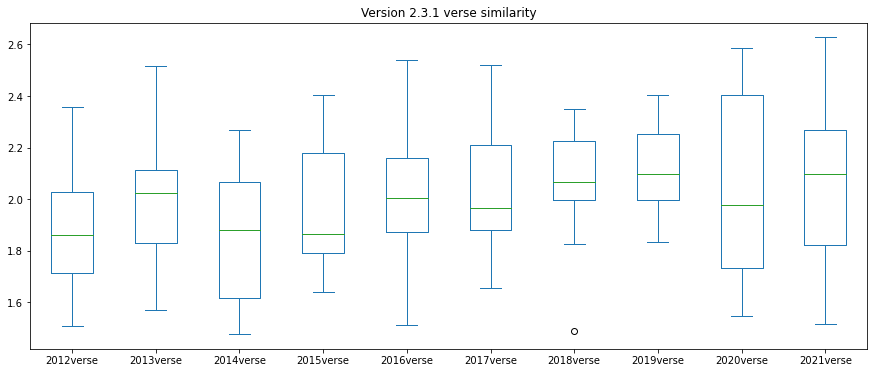

In [109]:
df_root_index_verse_v3_sentence = df_root_index_whole_v3_sentence[['2012verse','2013verse','2014verse','2015verse','2016verse', 
                                                        '2017verse', '2018verse','2019verse','2020verse','2021verse']]
df_root_index_verse_v3_sentence.plot.box(title = 'Version 2.3.1 verse similarity', figsize = (15, 6))

<AxesSubplot:title={'center':'Version 2.3.1 chorus similarity'}>

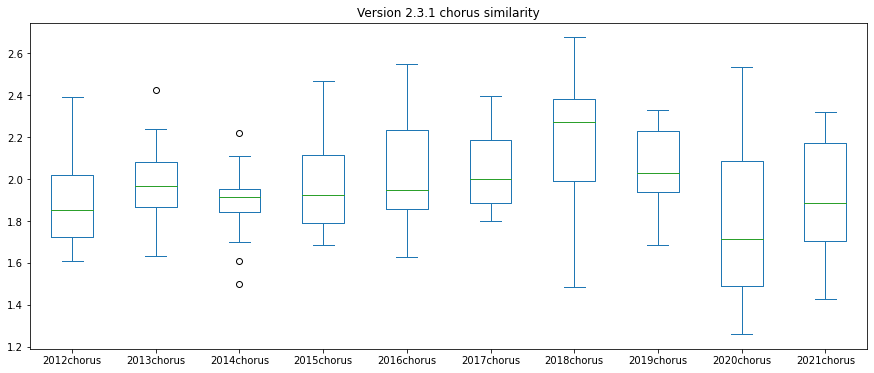

In [110]:
df_root_index_chorus_v3_sentence = df_root_index_whole_v3_sentence[['2012chorus','2013chorus','2014chorus','2015chorus','2016chorus', 
                                                        '2017chorus', '2018chorus','2019chorus','2020chorus','2021chorus']]
df_root_index_chorus_v3_sentence.plot.box(title = 'Version 2.3.1 chorus similarity', figsize = (15, 6))

<AxesSubplot:title={'center':'Version 2.3.1 total similarity'}>

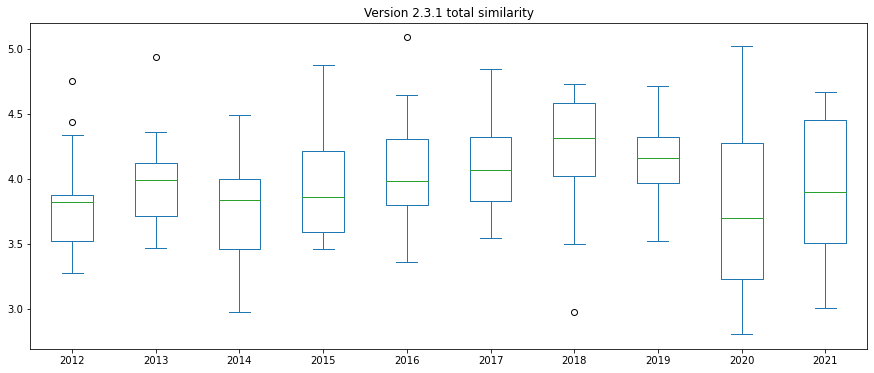

In [111]:
df_root_index_add_v3_sentence.plot.box(title = 'Version 2.3.1 total similarity', figsize = (15, 6))

## Version 2.3.2: First chord weights heavier; Progression as unit; Root transition

In [112]:
root_similarity_dict_whole_v3_progression = {}
root_similarity_dict_add_v3_progression = {}
similarity_matrix_dict_v2_3_2 = {}
for year in range(2012, 2022):
    verse_similarity_index, chorus_similarity_index = [], []
    verse = copy.deepcopy(progression_dict_combine[str(year)+'verse'])
    chorus = copy.deepcopy(progression_dict_combine[str(year)+'chorus'])
    #verse similarity calculation
    verse_similarity_matrix = np.zeros((len(verse), len(verse))) #compare similarity 2 by 2 and form a matrix
    for i in range(0, len(verse)):
        for j in range(0, len(verse)):
            if i == j:
                verse_similarity_matrix[i][j] = float('inf')
            else:
                verse_similarity_matrix[i][j] = root_similarity_index_v2(verse[i], verse[j], 0.5, 0.5)    
    #chorus similarity calculation
    chorus_similarity_matrix = np.zeros((len(chorus), len(chorus))) #compare similarity 2 by 2 and form a matrix
    for i in range(0, len(chorus)):
        for j in range(0, len(chorus)):
            if i == j:
                chorus_similarity_matrix[i][j] = float('inf')
            else:
                chorus_similarity_matrix[i][j] = root_similarity_index_v2(chorus[i], chorus[j], 0.5, 0.5) 
    similarity_matrix_dict_v2_3_2[str(year)+'verse'] = np.count_nonzero(verse_similarity_matrix == 0)
    similarity_matrix_dict_v2_3_2[str(year)+'chorus'] = np.count_nonzero(chorus_similarity_matrix == 0)
    verse_transpose = verse_similarity_matrix.transpose() 
    chorus_transpose = chorus_similarity_matrix.transpose()  
    for row in verse_transpose:
        inf_index = np.argmax(row==float('inf'))
        new_row = np.delete(row, inf_index)
        verse_similarity_index.append(np.mean(new_row))
    for row in chorus_transpose:
        inf_index = np.argmax(row==float('inf'))
        new_row = np.delete(row, inf_index)
        chorus_similarity_index.append(np.mean(new_row))
    root_similarity_dict_add_v3_progression[str(year)] = list(map(lambda x:x[0]+x[1], zip(verse_similarity_index,chorus_similarity_index)))
    root_similarity_dict_whole_v3_progression[str(year)+'verse'] =  verse_similarity_index
    root_similarity_dict_whole_v3_progression[str(year)+'chorus'] =  chorus_similarity_index

Text(0.5, 1.0, 'Exactly Same Chords in Each Year - Version 2.3.2')

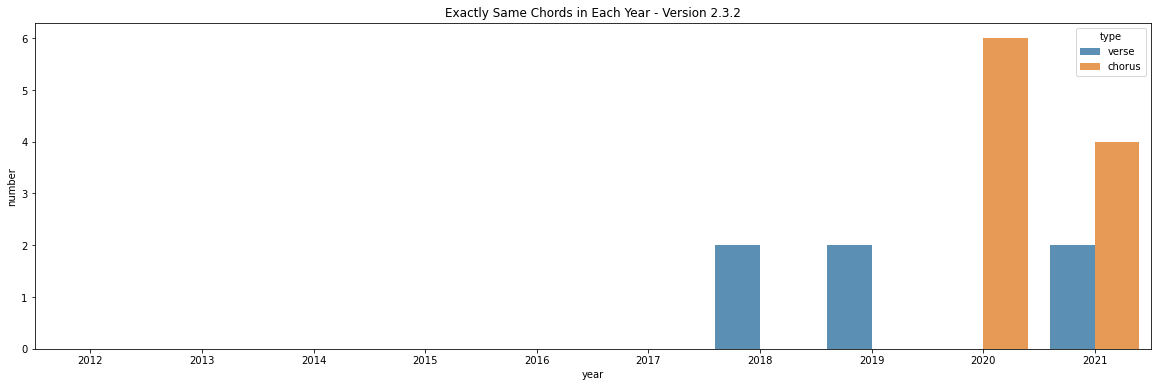

In [113]:
df_similarity_matrix_dict_v2_3_2 = []
for i in similarity_matrix_dict_v2_3_2.keys():
    year_list = []
    year_list.append(i[:4])
    year_list.append(i[4:])
    year_list.append(similarity_matrix_dict_v2_3_2[i])
    df_similarity_matrix_dict_v2_3_2.append(year_list)
df_similarity_matrix_v2_3_2 = pd.DataFrame(df_similarity_matrix_dict_v2_3_2,columns=['year','type','number'])
fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='year', y='number', hue = 'type', alpha = 0.8, data=df_similarity_matrix_v2_3_2)
ax.set_title('Exactly Same Chords in Each Year - Version 2.3.2')

In [114]:
df_root_index_whole_v3_progression = pd.DataFrame(columns = root_similarity_dict_whole_v3_progression.keys(), index=list(range(20)))
for i in root_similarity_dict_whole_v3_progression.keys():
    for j in range(0, len(root_similarity_dict_whole_v3_progression[i])):
        df_root_index_whole_v3_progression[i][j] = root_similarity_dict_whole_v3_progression[i][j]    
df_root_index_whole_v3_progression

,2012verse,2012chorus,2013verse,2013chorus,2014verse,2014chorus,2015verse,2015chorus,2016verse,2016chorus,2017verse,2017chorus,2018verse,2018chorus,2019verse,2019chorus,2020verse,2020chorus,2021verse,2021chorus
0,1.464289,1.447707,1.566969,1.922212,1.851926,1.384726,1.512911,1.518168,1.487997,1.468235,1.451497,1.830755,1.840217,1.41104,2.072376,1.939918,2.031714,2.007829,1.265121,1.241337
1,1.428873,1.470656,1.311379,1.453872,1.246536,1.314067,1.74019,1.620871,1.628863,1.606081,1.484152,1.449742,1.481939,1.748036,1.245656,1.369853,1.485529,1.898511,1.322152,1.267648
2,1.640706,1.572084,1.324206,1.466619,1.373796,1.349251,1.341028,1.373541,1.605982,1.661867,1.49864,1.417219,1.265829,1.589261,1.322491,1.334172,1.543167,1.609736,1.560254,1.571422
3,1.521729,1.741473,1.295847,1.278656,1.37986,1.274133,1.463182,1.464609,1.76108,1.80658,1.481783,1.31051,1.420731,1.33571,1.482704,1.492684,1.792814,1.222293,1.320573,1.363597
4,1.5345,1.274019,1.184904,1.30974,1.446597,1.809713,1.613966,1.505624,1.617817,1.708952,1.649098,1.442282,1.437306,1.412242,1.400121,1.593952,1.260511,1.602521,1.607291,1.668219
5,1.780752,1.9784,1.367075,1.428782,1.353838,1.526435,1.994819,1.534109,1.726591,1.554057,1.61534,1.339937,1.265829,1.770508,1.806044,2.135311,1.505023,1.794987,1.319373,1.320316
6,1.457163,1.621246,1.373886,1.537099,1.479542,1.414532,1.96692,2.092338,1.874861,1.367991,1.486968,1.405375,2.07925,1.541364,1.534156,1.705527,1.492741,1.524598,1.487066,1.636712
7,1.53041,1.569889,1.35553,1.373804,1.267462,1.470891,1.437608,1.502856,1.569783,1.489374,1.777593,1.53016,1.371738,1.35807,1.439286,1.594628,1.99899,2.101024,1.294418,1.312637
8,1.446402,1.225648,1.585673,1.677205,1.258825,1.211797,1.870117,1.886283,1.5497,1.497925,1.824464,1.589151,1.402295,1.294799,1.365271,1.319611,1.638113,2.029023,1.490414,1.505029
9,1.747637,1.722814,1.297261,1.429295,1.627715,1.544884,1.512683,1.501387,1.394047,1.4005,1.703398,1.472041,1.350278,1.256009,1.56014,1.312861,1.787342,1.684493,1.557342,1.297772


In [115]:
df_root_index_add_v3_progression = pd.DataFrame(columns = root_similarity_dict_add_v3_progression.keys(), index=list(range(20)))
for i in root_similarity_dict_add_v3_progression.keys():
    for j in range(0, len(root_similarity_dict_add_v3_progression[i])):
        df_root_index_add_v3_progression[i][j] = root_similarity_dict_add_v3_progression[i][j]    
df_root_index_add_v3_progression

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,2.911997,3.489181,3.236652,3.031078,2.956232,3.282252,3.251257,4.012294,4.039543,2.506458
1,2.899529,2.765251,2.560603,3.361062,3.234944,2.933895,3.229975,2.615509,3.38404,2.5898
2,3.212789,2.790825,2.723046,2.714569,3.267849,2.915859,2.85509,2.656663,3.152903,3.131676
3,3.263202,2.574502,2.653994,2.927791,3.56766,2.792293,2.756441,2.975388,3.015107,2.68417
4,2.808519,2.494644,3.25631,3.11959,3.326769,3.091379,2.849548,2.994073,2.863032,3.27551
5,3.759153,2.795857,2.880273,3.528929,3.280648,2.955277,3.036337,3.941355,3.30001,2.639689
6,3.078409,2.910985,2.894074,4.059258,3.242852,2.892343,3.620614,3.239683,3.017339,3.123778
7,3.100299,2.729335,2.738353,2.940463,3.059157,3.307753,2.729809,3.033914,4.100015,2.607054
8,2.67205,3.262879,2.470622,3.7564,3.047625,3.413615,2.697094,2.684882,3.667136,2.995443
9,3.470451,2.726556,3.172599,3.014069,2.794547,3.175439,2.606287,2.873,3.471834,2.855114


<AxesSubplot:title={'center':'Version 2.3.2 verse similarity'}>

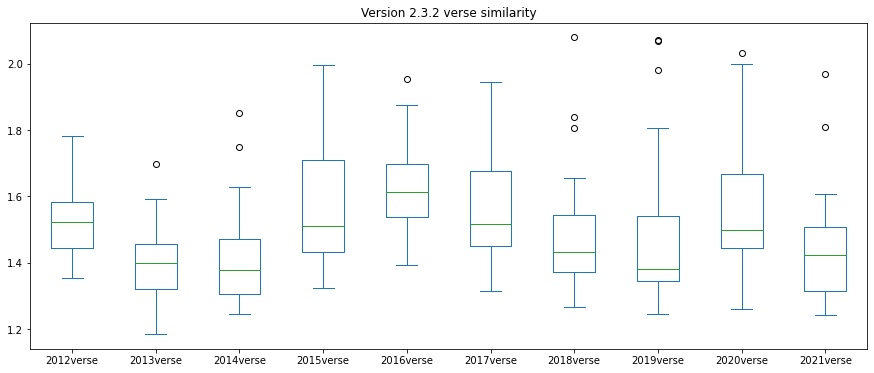

In [116]:
df_root_index_verse_v3_progression = df_root_index_whole_v3_progression[['2012verse','2013verse','2014verse','2015verse','2016verse', 
                                                               '2017verse', '2018verse','2019verse','2020verse','2021verse']]
df_root_index_verse_v3_progression.plot.box(title = 'Version 2.3.2 verse similarity', figsize = (15, 6))

<AxesSubplot:title={'center':'Version 2.3.2 chorus similarity'}>

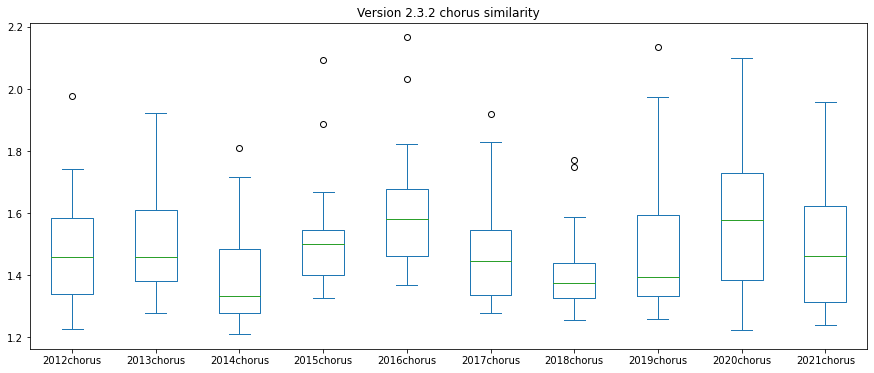

In [117]:
df_root_index_chorus_v3_progression = df_root_index_whole_v3_progression[['2012chorus','2013chorus','2014chorus','2015chorus','2016chorus', 
                                                                '2017chorus', '2018chorus','2019chorus','2020chorus','2021chorus']]
df_root_index_chorus_v3_progression.plot.box(title = 'Version 2.3.2 chorus similarity', figsize = (15, 6))

<AxesSubplot:title={'center':'Version 2.3.2 total similarity'}>

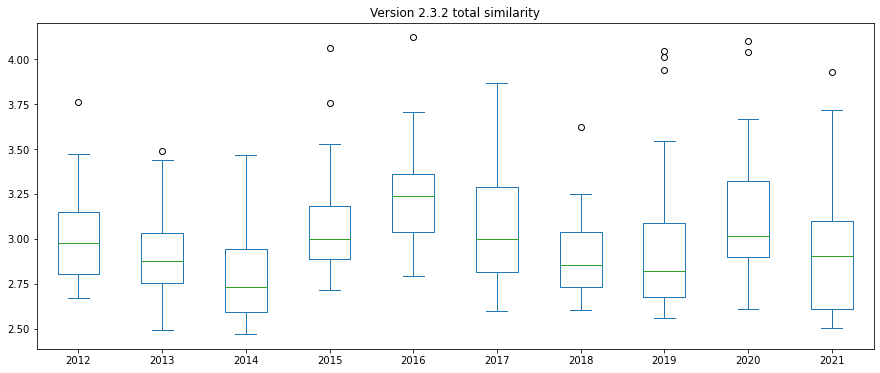

In [118]:
df_root_index_add_v3_progression.plot.box(title = 'Version 2.3.2 total similarity', figsize = (15, 6))

# Results

## boxplot

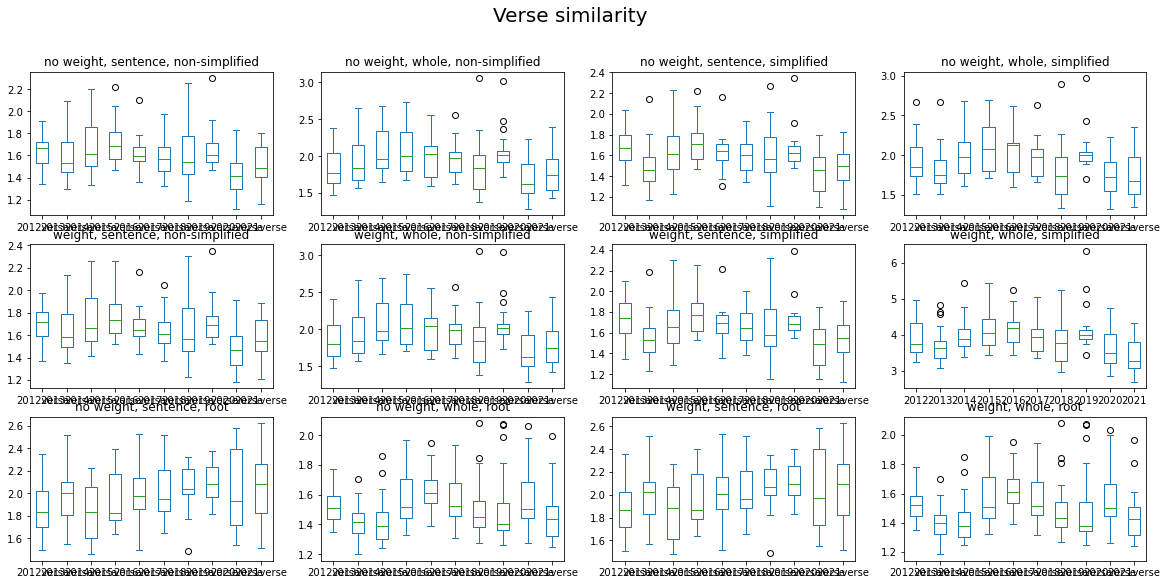

In [119]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize = (20, 9)) 
fig.suptitle('Verse similarity', fontsize=20)
df_index_verse_v1_sentence.plot.box(title = 'no weight, sentence, non-simplified', ax=axes[0,0])
df_index_verse_v1_progression.plot.box(title = 'no weight, whole, non-simplified', ax=axes[0,1])
df_simplified_verse_whole_v1_sentence.plot.box(title = 'no weight, sentence, simplified', ax=axes[0,2])
df_simplified_verse_whole_v1_progression.plot.box(title = 'no weight, whole, simplified', ax=axes[0,3])
df_index_verse_v2_sentence.plot.box(title = 'weight, sentence, non-simplified', ax=axes[1,0])
df_index_verse_v2_progression.plot.box(title = 'weight, whole, non-simplified', ax=axes[1,1])
df_simplified_verse_whole_v2_sentence.plot.box(title = 'weight, sentence, simplified', ax=axes[1,2])
df_simplified_add_v2_progression.plot.box(title = 'weight, whole, simplified', ax=axes[1,3])
df_index_verse_v3_sentence.plot.box(title = 'no weight, sentence, root', ax=axes[2,0])
df_index_verse_v3_progression.plot.box(title = 'no weight, whole, root', ax=axes[2,1])
df_root_index_verse_v3_sentence.plot.box(title = 'weight, sentence, root', ax=axes[2,2])
df_root_index_verse_v3_progression.plot.box(title = 'weight, whole, root', ax=axes[2,3])
plt.show()

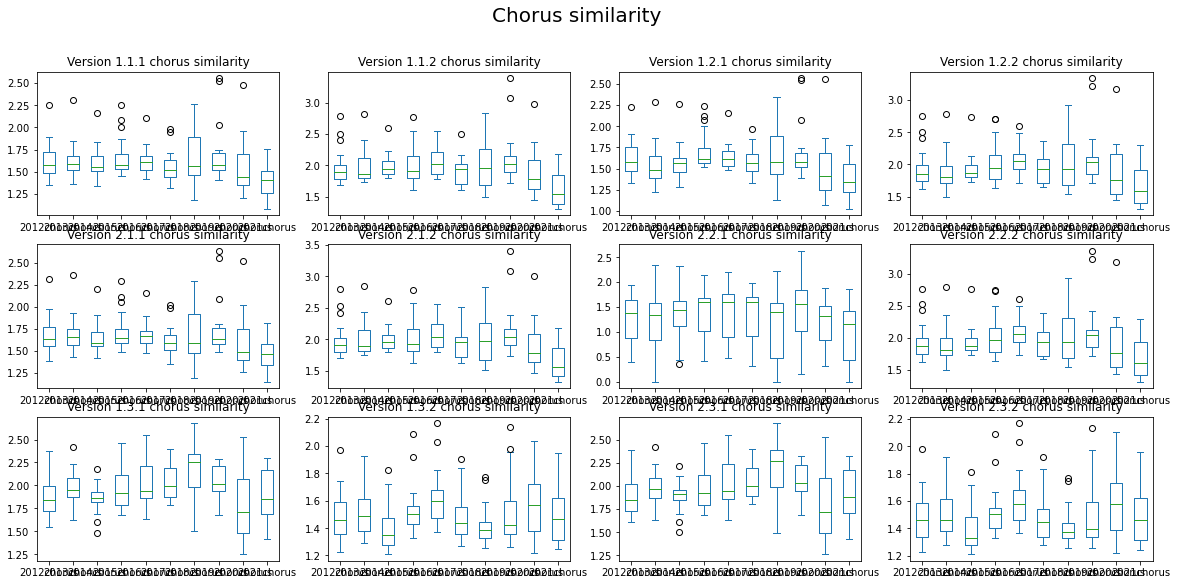

In [120]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize = (20, 9)) 
fig.suptitle('Chorus similarity', fontsize=20)
df_index_chorus_v1_sentence.plot.box(title = 'Version 1.1.1 chorus similarity', ax=axes[0,0])
df_index_chorus_v1_progression.plot.box(title = 'Version 1.1.2 chorus similarity', ax=axes[0,1])
df_simplified_chorus_v1_sentence.plot.box(title = 'Version 1.2.1 chorus similarity', ax=axes[0,2])
df_simplified_chorus_v1_progression.plot.box(title = 'Version 1.2.2 chorus similarity', ax=axes[0,3])
df_index_chorus_v2_sentence.plot.box(title = 'Version 2.1.1 chorus similarity', ax=axes[1,0])
df_index_chorus_v2_progression.plot.box(title = 'Version 2.1.2 chorus similarity', ax=axes[1,1])
df_simplified_chorus_v2_sentence.plot.box(title = 'Version 2.2.1 chorus similarity', ax=axes[1,2])
df_simplified_chorus_v2_progression.plot.box(title = 'Version 2.2.2 chorus similarity', ax=axes[1,3])
df_index_chorus_v3_sentence.plot.box(title = 'Version 1.3.1 chorus similarity', ax=axes[2,0])
df_index_chorus_v3_progression.plot.box(title = 'Version 1.3.2 chorus similarity', ax=axes[2,1])
df_root_index_chorus_v3_sentence.plot.box(title = 'Version 2.3.1 chorus similarity', ax=axes[2,2])
df_root_index_chorus_v3_progression.plot.box(title = 'Version 2.3.2 chorus similarity', ax=axes[2,3])
plt.show()

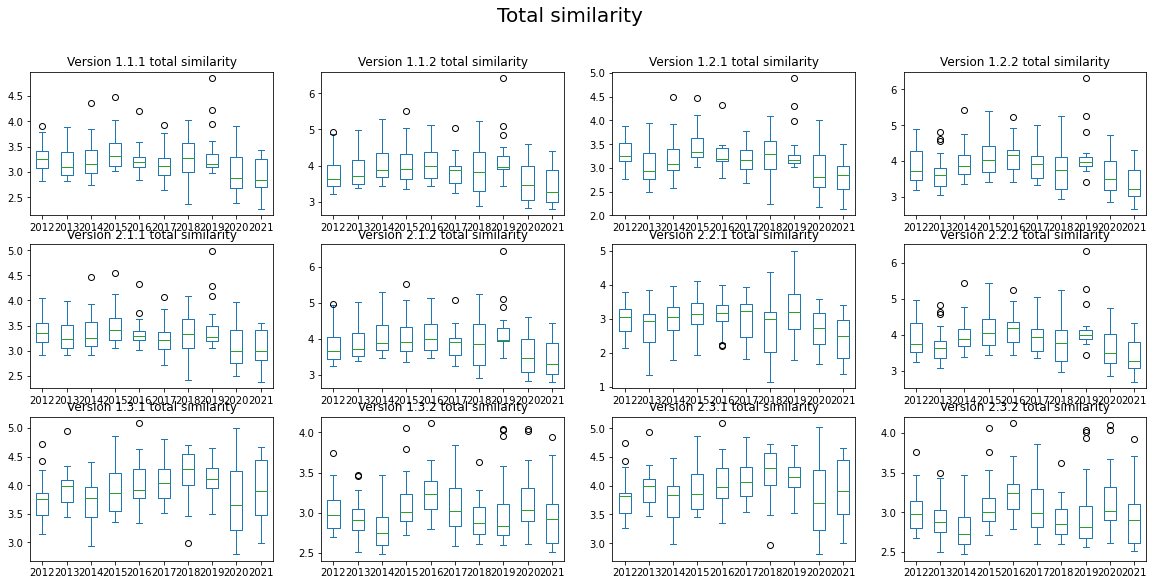

In [121]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize = (20, 9)) 
fig.suptitle('Total similarity', fontsize=20)
df_index_add_v1_sentence.plot.box(title = 'Version 1.1.1 total similarity', ax=axes[0,0])
df_index_add_v1_progression.plot.box(title = 'Version 1.1.2 total similarity', ax=axes[0,1])
df_simplified_add_v1_sentence.plot.box(title = 'Version 1.2.1 total similarity', ax=axes[0,2])
df_simplified_add_v1_progression.plot.box(title = 'Version 1.2.2 total similarity', ax=axes[0,3])
df_index_add_v2_sentence.plot.box(title = 'Version 2.1.1 total similarity', ax=axes[1,0])
df_index_add_v2_progression.plot.box(title = 'Version 2.1.2 total similarity', ax=axes[1,1])
df_simplified_add_v2_sentence.plot.box(title = 'Version 2.2.1 total similarity', ax=axes[1,2])
df_simplified_add_v2_progression.plot.box(title = 'Version 2.2.2 total similarity', ax=axes[1,3])
df_index_add_v3_sentence.plot.box(title = 'Version 1.3.1 total similarity', ax=axes[2,0])
df_index_add_v3_progression.plot.box(title = 'Version 1.3.2 total similarity', ax=axes[2,1])
df_root_index_add_v3_sentence.plot.box(title = 'Version 2.3.1 total similarity', ax=axes[2,2])
df_root_index_add_v3_progression.plot.box(title = 'Version 2.3.2 total similarity', ax=axes[2,3])
plt.show()

# TO DO LIST
1. Collect more data (but not necessary)
2. Human rating similarity (time-consuming and not practical)
3. Parameter tuning for chords' weights

# NEW IDEAS
1. Feb 28: Autocorrelation function concept
2. Mar 02: Consider a group as a new element, build up a new matrix based on the chunks
3. Mar 08: How to measure the chord progression similarity based on progression groups? Should there be any weight? Or an other transition matrix should be built?
4. 